# Jupyter Notebook - EXP 6

## Código Geral

In [1]:
from scipy.stats import poisson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

## 4.1 - Espectómetro de desvio constante

Visualização ótica e dados no logbook.

In [8]:
import pandas as pd
from IPython.display import display_html

# Dados das riscas do espectro do sódio
dados = {
    'λ (nm)': [
        330.3, 332.0, 332.4, 334.0, 338.3,
        340.0, 347.2, 353.4, 358.6, 372.2,
        396.2, 403.0, 404.5, 435.0, 486.1,
        500.0, 518.0, 572.0, 589.0, 589.6,
        618.0, 624.0, 630.0, 680.0, 700.0
    ],
    'Intensidade': [
        0.15, 0.10, 0.20, 0.30, 0.05,
        0.40, 0.25, 0.10, 0.15, 0.35,
        0.40, 0.45, 0.50, 0.50, 0.60,
        0.70, 0.55, 0.65, 1.00, 0.95,
        0.20, 0.15, 0.10, 0.05, 0.02
    ]
}

# Criando DataFrame
df_riscas = pd.DataFrame(dados)

# Dividindo a tabela em duas partes
df_riscas_1 = df_riscas.iloc[:len(df_riscas)//2]
df_riscas_2 = df_riscas.iloc[len(df_riscas)//2:]

# Exibindo as tabelas lado a lado
display_html(df_riscas_1.to_html(index=False), raw=True)
display_html(df_riscas_2.to_html(index=False), raw=True)


λ (nm),Intensidade
330.3,0.15
332.0,0.10
332.4,0.20
334.0,0.30
338.3,0.05
340.0,0.40
347.2,0.25
353.4,0.10
358.6,0.15
372.2,0.35


λ (nm),Intensidade
404.5,0.50
435.0,0.50
486.1,0.60
500.0,0.70
518.0,0.55
572.0,0.65
589.0,1.00
589.6,0.95
618.0,0.20
624.0,0.15


In [1]:
import pandas as pd

# Dados das riscas do espectro do sódio
dados_riscas = {
    'Comprimento de Onda (nm)': [
        330.3, 332.0, 332.4, 334.0, 338.3,
        340.0, 347.2, 353.4, 358.6, 372.2,
        396.2, 403.0, 404.5, 435.0, 486.1,
        500.0, 518.0, 572.0, 589.0, 589.6,
        618.0, 624.0, 630.0, 680.0, 700.0
    ],
    'Intensidade': [
        0.15, 0.10, 0.20, 0.30, 0.05,
        0.40, 0.25, 0.10, 0.15, 0.35,
        0.40, 0.45, 0.50, 0.50, 0.60,
        0.70, 0.55, 0.65, 1.00, 0.95,
        0.20, 0.15, 0.10, 0.05, 0.02
    ]
}

# Dados medidos
dados_medidos = {
    'Valor Medido (nm)': [589, 618, 572, 518, 500, 475, 469],
    'Descrição': ['Mais forte', 'Vermelho', 'Verde', 'Verde', 'Azul Ciano', 'Muito Ténue', 'Azul']
}

# Criando DataFrames
df_riscas = pd.DataFrame(dados_riscas)
df_medidos = pd.DataFrame(dados_medidos)

# Criando uma tabela comparativa
tabela_comparativa = pd.DataFrame({
    'Valor Medido (nm)': df_medidos['Valor Medido (nm)'],
    'Descrição na medição': df_medidos['Descrição'],
    'Diferença (nm)': None,
    'Proximidade': None,
    'Valor Proximo (nm)': None,
    'Intensidade Proxima': None
})

# Comparando os valores medidos com as riscas do sódio
for i in range(len(tabela_comparativa)):
    medido = tabela_comparativa.loc[i, 'Valor Medido (nm)']
    
    # Encontrar o valor mais próximo na tabela de riscas
    valor_proximo = min(df_riscas['Comprimento de Onda (nm)'], key=lambda x: abs(medido - x))
    tabela_comparativa.loc[i, 'Valor Proximo (nm)'] = valor_proximo
    tabela_comparativa.loc[i, 'Diferença (nm)'] = abs(medido - valor_proximo)
    
    # Obter a intensidade da risca mais próxima
    intensidade_proxima = df_riscas.loc[df_riscas['Comprimento de Onda (nm)'] == valor_proximo, 'Intensidade'].values[0]
    tabela_comparativa.loc[i, 'Intensidade Relativa'] = intensidade_proxima
    
    # Verificar se está próximo de qualquer valor real dentro da faixa de incerteza
    if tabela_comparativa.loc[i, 'Diferença (nm)'] <= 5.0:
        tabela_comparativa.loc[i, 'Proximidade'] = 'Próximo'
    else:
        tabela_comparativa.loc[i, 'Proximidade'] = 'Distante'

# Ordenando a tabela por valores medidos
tabela_comparativa.sort_values(by='Valor Medido (nm)', inplace=True)

# Exibindo a tabela comparativa
print(tabela_comparativa.reset_index(drop=True))

   Valor Medido (nm) Descrição na medição Diferença (nm) Proximidade  \
0                469                 Azul           17.1    Distante   
1                475          Muito Ténue           11.1    Distante   
2                500           Azul Ciano            0.0     Próximo   
3                518                Verde            0.0     Próximo   
4                572                Verde            0.0     Próximo   
5                589           Mais forte            0.0     Próximo   
6                618             Vermelho            0.0     Próximo   

  Valor Proximo (nm) Intensidade Proxima  Intensidade Relativa  
0              486.1                None                  0.60  
1              486.1                None                  0.60  
2              500.0                None                  0.70  
3              518.0                None                  0.55  
4              572.0                None                  0.65  
5              589.0             

In [1]:
# Valores medidos e valores reais
valores_medidos = [572, 618]
valores_reais = [568.82, 616.07]

# Calcular o erro relativo
def calcular_erro_relativo(valor_medido, valor_real):
    erro_absoluto = abs(valor_medido - valor_real)
    erro_relativo = (erro_absoluto / valor_real) * 100
    return erro_relativo

# Criar uma lista de erros relativos
erros_relativos = [
    calcular_erro_relativo(medido, real) 
    for medido, real in zip(valores_medidos, valores_reais)
]

# Apresentar os resultados
print("Resultados da Análise:")
for i, (medido, real, erro) in enumerate(zip(valores_medidos, valores_reais, erros_relativos), start=1):
    print(f"Valor {i}:")
    print(f"  Medido: {medido} nm")
    print(f"  Real: {real} nm")
    print(f"  Erro relativo: {erro:.2f} %")

Resultados da Análise:
Valor 1:
  Medido: 572 nm
  Real: 568.82 nm
  Erro relativo: 0.56 %
Valor 2:
  Medido: 618 nm
  Real: 616.07 nm
  Erro relativo: 0.31 %


### Espectro do Sódio VIS_NIR

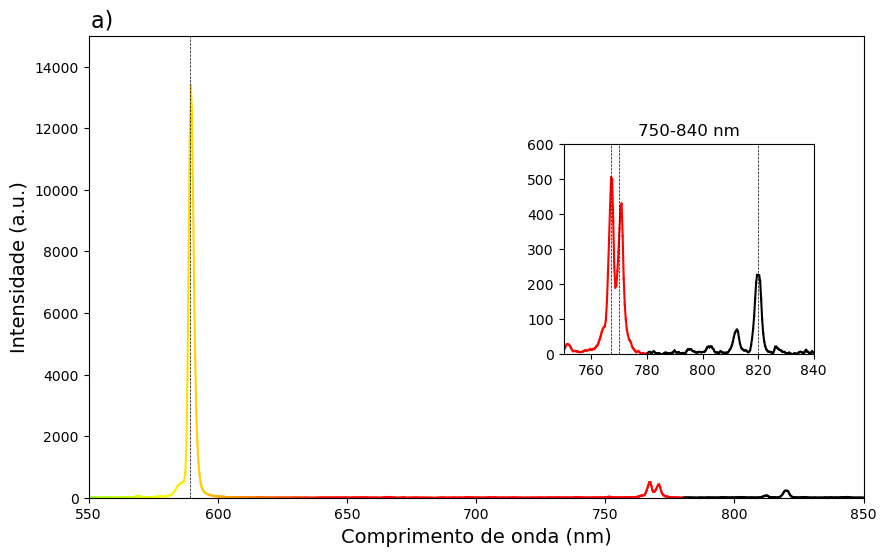

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura de Dados baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/Sodio_vis_nir.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

# Criar o gráfico principal
plt.figure(figsize=(10, 6))

# Função de mapeamento de cores
def wavelength_to_rgb(wavelength):
    """Converte um comprimento de onda em uma cor RGB"""
    if wavelength < 380:
        return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
    elif wavelength < 440:
        return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
    elif wavelength < 490:
        return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
    elif wavelength < 510:
        return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
    elif wavelength < 580:
        return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
    elif wavelength < 645:
        return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
    elif wavelength <= 780:
        return (1, 0, 0)  # Vermelho
    else:
        return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

# Plotar os segmentos de linhas com cores de acordo com os comprimentos de onda
for i in range(len(wavelengths) - 1):
    # Aplique a cor amarela a 589 nm
    if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
        plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')  # Cor amarela
    else:
        plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))

# Título e rótulos
plt.title('a)                                                                                                         ', fontsize=16)
plt.xlabel('Comprimento de onda (nm)', fontsize=14)
plt.ylabel('Intensidade (a.u.)', fontsize=14)

# Adicionar uma linha vertical tracejada em 589 nm com espessura menor
plt.axvline(x=589.3, color='black', linestyle='--', linewidth=0.5, label='589 nm')

# Ajusta o limite do eixo x para começar em 500 nm
plt.xlim(550, 850)

# Ajusta o limite do eixo y para começar em 0 (eliminar intensidades negativas)
plt.ylim(0, 15000)  # Limita o eixo y para não mostrar valores negativos

# Inset para a gama de 700-900 nm
ax_inset = plt.axes([0.6, 0.35, 0.25, 0.35])  # Ajusta a posição vertical (0.35 é mais baixo que 0.5)
for i in range(len(wavelengths) - 1):
    if 700 <= wavelengths[i] <= 900:
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            ax_inset.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')  # Cor amarela
        else:
            ax_inset.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))
ax_inset.set_xlim(750, 840)  # Define o limite do eixo x para o gráfico inserido
ax_inset.set_ylim(0, 600)   # Define o limite do eixo y para a intensidade no gráfico inserido
ax_inset.set_title('750-840 nm')
ax_inset.axvline(x=767, color='black', linestyle='--', linewidth=0.5, label='589 nm')
ax_inset.axvline(x=770, color='black', linestyle='--', linewidth=0.5, label='589 nm')
ax_inset.axvline(x=820, color='black', linestyle='--', linewidth=0.5, label='589 nm')

# Exibir o gráfico
plt.show()

### Espectro de Sódio UV_VIS

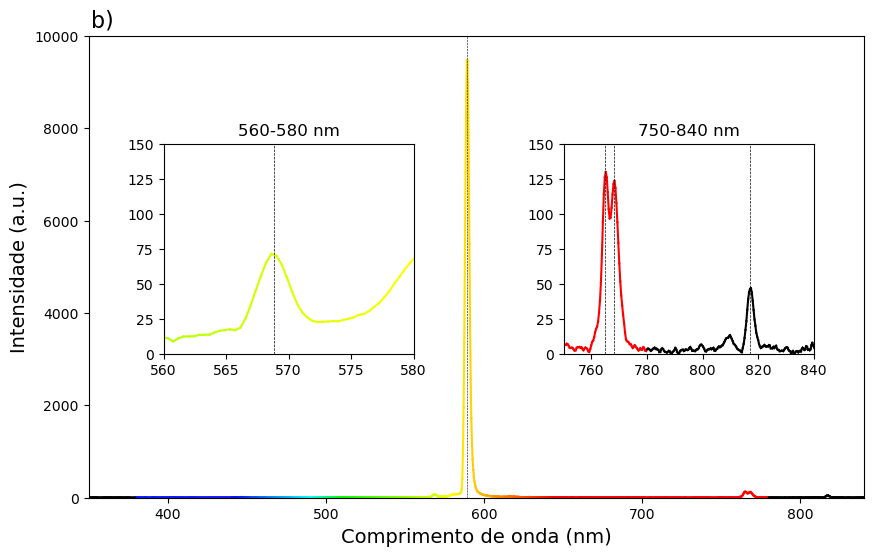

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Inicialização
wavelengths = []
intensities = []

# Leitura de Dados baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/Sodio_uv_vis.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')  # Cor amarela
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))

    # Título e rótulos
    plt.title('b)                                                                                                         ', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Limites dos eixos
    plt.xlim(350, 840)
    plt.ylim(0, 10000)
    
    # Adicionar uma linha vertical tracejada em 589 nm com espessura menor
    plt.axvline(x=589.3, color='black', linestyle='--', linewidth=0.4, label='589 nm')

    # Inset para a gama de 700-900 nm
    ax_inset = plt.axes([0.6, 0.35, 0.25, 0.35])  # Ajusta a posição vertical (0.35 é mais baixo que 0.5)
    for i in range(len(wavelengths) - 1):
        if 700 <= wavelengths[i] <= 900:
            if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                ax_inset.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')  # Cor amarela
            else:
                ax_inset.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))
    ax_inset.set_xlim(750, 840)
    ax_inset.set_ylim(0, 150)
    ax_inset.axvline(x=765, color='black', linestyle='--', linewidth=0.5, label='589 nm')
    ax_inset.axvline(x=768, color='black', linestyle='--', linewidth=0.5, label='589 nm')
    ax_inset.axvline(x=817, color='black', linestyle='--', linewidth=0.5, label='589 nm')
    ax_inset.set_title('750-840 nm')

    # Inset para a gama de 550-590 nm
    ax_inset2 = plt.axes([0.2, 0.35, 0.25, 0.35])
    for i in range(len(wavelengths) - 1):
        if 550 <= wavelengths[i] <= 590:
            if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                ax_inset2.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')  # Cor amarela
            else:
                ax_inset2.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))
    ax_inset2.set_xlim(560, 580)
    ax_inset2.set_ylim(0, 150)
    ax_inset2.axvline(x=568.8, color='black', linestyle='--', linewidth=0.5, label='589 nm')
    ax_inset2.set_title('560-580 nm')

    # Exibir o gráfico
    plt.show()

In [4]:
# Valores de referência e medições obtidas
valores_referencia = [568.82, 589.00, 790.98, 819.48]  # Valores de referência
valores_obtidos = [568.8, 589.3, 770, 820]  # Valores obtidos

# Calculando os erros absolutos
erros_absolutos = [abs(ref - obt) for ref, obt in zip(valores_referencia, valores_obtidos)]

# Calculando os erros relativos em percentagem
erros_percentuais = [(abs(ref - obt) / ref) * 100 for ref, obt in zip(valores_referencia, valores_obtidos)]

# Apresentando os resultados
print("Resultados das medições:")
for i, (ref, obt, erro_abs, erro_perc) in enumerate(zip(valores_referencia, valores_obtidos, erros_absolutos, erros_percentuais), start=1):
    print(f"Medição {i}:")
    print(f"  Valor de Referência: {ref:.2f} nm")
    print(f"  Valor Obtido: {obt:.2f} nm")
    print(f"  Erro Absoluto: {erro_abs:.2f} nm")
    print(f"  Erro Relativo: {erro_perc:.3f}%")

Resultados das medições:
Medição 1:
  Valor de Referência: 568.82 nm
  Valor Obtido: 568.80 nm
  Erro Absoluto: 0.02 nm
  Erro Relativo: 0.004%
Medição 2:
  Valor de Referência: 589.00 nm
  Valor Obtido: 589.30 nm
  Erro Absoluto: 0.30 nm
  Erro Relativo: 0.051%
Medição 3:
  Valor de Referência: 790.98 nm
  Valor Obtido: 770.00 nm
  Erro Absoluto: 20.98 nm
  Erro Relativo: 2.652%
Medição 4:
  Valor de Referência: 819.48 nm
  Valor Obtido: 820.00 nm
  Erro Absoluto: 0.52 nm
  Erro Relativo: 0.063%


## Resolução Espectral

### VIS_NIR

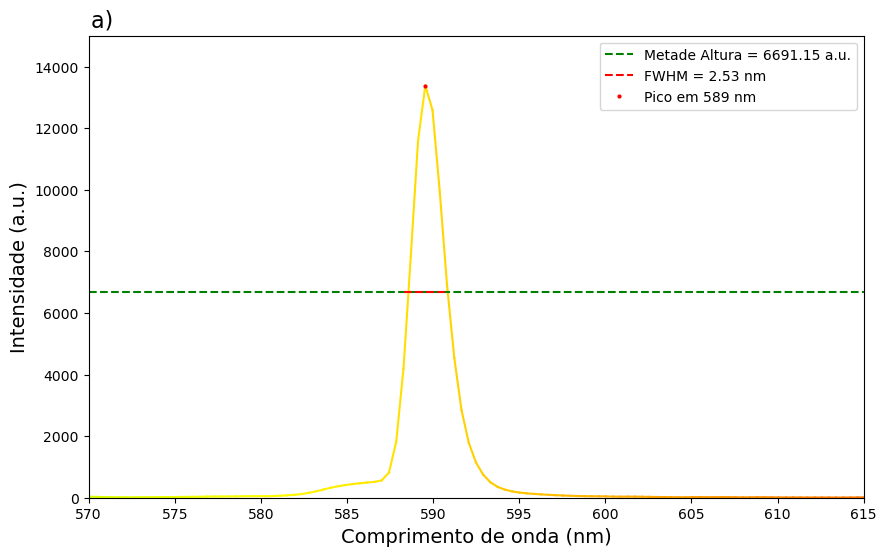

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura de Dados baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/Sodio_vis_nir.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Identificar o índice do pico (589 nm)
    pico_index = np.argmax(intensities_corrigidas[(wavelengths >= 588.5) & (wavelengths <= 589.5)])  # Índice do pico em 589 nm
    pico_index += np.where(wavelengths >= 589.1)[0][0]  # Ajusta o índice para o intervalo global

    # Altura máxima do pico
    altura_maxima = intensities_corrigidas[pico_index]

    # Metade da altura do pico
    metade_altura = altura_maxima / 2

    # Encontrar os pontos em que a intensidade cruza a metade da altura
    cruzamentos = np.where(np.diff(np.sign(intensities_corrigidas - metade_altura)))[0]

    if len(cruzamentos) >= 2:
        # Os pontos onde a reta cruza a curva da intensidade
        fwhm_start = wavelengths[cruzamentos[0]]  # Ponto à esquerda
        fwhm_end = wavelengths[cruzamentos[-1]]   # Ponto à direita

        # Calcula a largura a meia altura
        fwhm = fwhm_end - fwhm_start

        # Criar o gráfico principal
        plt.figure(figsize=(10, 6))

        # Função de mapeamento de cores
        def wavelength_to_rgb(wavelength):
            """Converte um comprimento de onda em uma cor RGB"""
            if wavelength < 380:
                return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
            elif wavelength < 440:
                return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
            elif wavelength < 490:
                return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
            elif wavelength < 510:
                return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
            elif wavelength < 580:
                return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
            elif wavelength < 645:
                return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
            elif wavelength <= 780:
                return (1, 0, 0)  # Vermelho
            else:
                return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

        # Plotar os segmentos de linhas com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths) - 1):
            if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')  # Cor amarela
            else:
                plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))

        # Desenhar a linha de metade da altura
        plt.axhline(metade_altura, color='green', linestyle='--', label=f'Metade Altura = {metade_altura:.2f} a.u.')

        # Destacar a largura a meia altura (FWHM)
        plt.hlines(metade_altura, fwhm_start, fwhm_end, color='red', linestyles='dashed', label=f'FWHM = {fwhm:.2f} nm')

        # Assinalar o pico
        plt.plot(wavelengths[pico_index], altura_maxima, 'ro', markersize=2, label=f'Pico em 589 nm')

        # Título e rótulos
        plt.title('a)                                                                                                         ', fontsize=16)
        plt.xlabel('Comprimento de onda (nm)', fontsize=14)
        plt.ylabel('Intensidade (a.u.)', fontsize=14)

        # Ajustar o limite do eixo x para começar em 570 nm
        plt.xlim(570, 615)

        # Ajustar o limite do eixo y
        plt.ylim(0, 15000)

        # Exibir legenda
        plt.legend()

        # Exibir o gráfico
        plt.show()

    else:
        print("Não foi possível calcular a FWHM corretamente.")

### UV_VIS

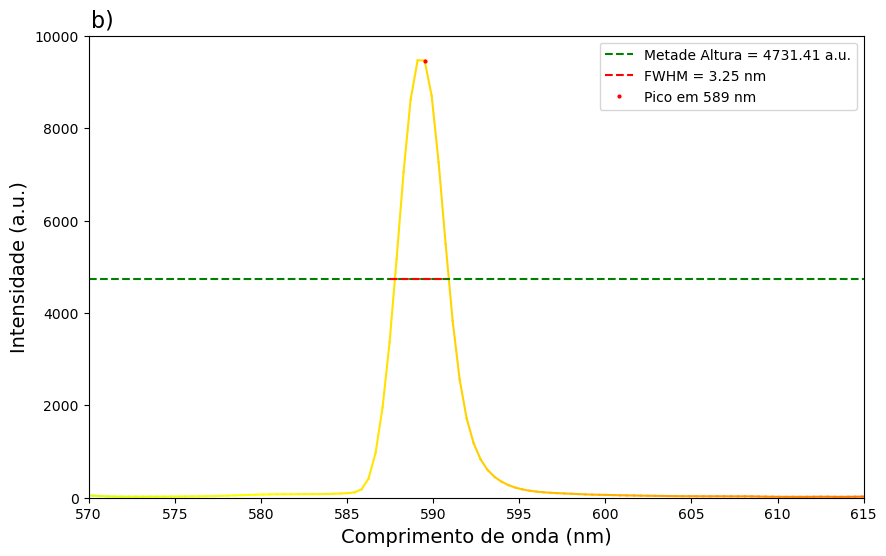

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura de Dados baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/Sodio_uv_vis.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Identificar o índice do pico (589 nm)
    pico_index = np.argmax(intensities_corrigidas[(wavelengths >= 588.5) & (wavelengths <= 589.5)])  # Índice do pico em 589 nm
    pico_index += np.where(wavelengths >= 588.697)[0][0]  # Ajusta o índice para o intervalo global

    # Altura máxima do pico
    altura_maxima = intensities_corrigidas[pico_index]

    # Metade da altura do pico
    metade_altura = altura_maxima / 2

    # Encontrar os pontos em que a intensidade cruza a metade da altura
    cruzamentos = np.where(np.diff(np.sign(intensities_corrigidas - metade_altura)))[0]

    if len(cruzamentos) >= 2:
        # Os pontos onde a reta cruza a curva da intensidade
        fwhm_start = wavelengths[cruzamentos[0]]  # Ponto à esquerda
        fwhm_end = wavelengths[cruzamentos[-1]]   # Ponto à direita

        # Calcula a largura a meia altura
        fwhm = fwhm_end - fwhm_start

        # Criar o gráfico principal
        plt.figure(figsize=(10, 6))

        # Função de mapeamento de cores
        def wavelength_to_rgb(wavelength):
            """Converte um comprimento de onda em uma cor RGB"""
            if wavelength < 380:
                return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
            elif wavelength < 440:
                return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
            elif wavelength < 490:
                return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
            elif wavelength < 510:
                return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
            elif wavelength < 580:
                return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
            elif wavelength < 645:
                return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
            elif wavelength <= 780:
                return (1, 0, 0)  # Vermelho
            else:
                return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

        # Plotar os segmentos de linhas com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths) - 1):
            if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')  # Cor amarela
            else:
                plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))

        # Desenhar a linha de metade da altura
        plt.axhline(metade_altura, color='green', linestyle='--', label=f'Metade Altura = {metade_altura:.2f} a.u.')

        # Destacar a largura a meia altura (FWHM)
        plt.hlines(metade_altura, fwhm_start, fwhm_end, color='red', linestyles='dashed', label=f'FWHM = {fwhm:.2f} nm')

        # Assinalar o pico
        plt.plot(wavelengths[pico_index], altura_maxima, 'ro', markersize=2, label=f'Pico em 589 nm')

        # Título e rótulos
        plt.title('b)                                                                                                         ', fontsize=16)
        plt.xlabel('Comprimento de onda (nm)', fontsize=14)
        plt.ylabel('Intensidade (a.u.)', fontsize=14)

        # Ajustar o limite do eixo x para começar em 570 nm
        plt.xlim(570, 615)

        # Ajustar o limite do eixo y
        plt.ylim(0, 10000)

        # Exibir legenda
        plt.legend()

        # Exibir o gráfico
        plt.show()

    else:
        print("Não foi possível calcular a FWHM corretamente.")

## Transmitância e densidade ótica

#### Halogénio VIS_NIR

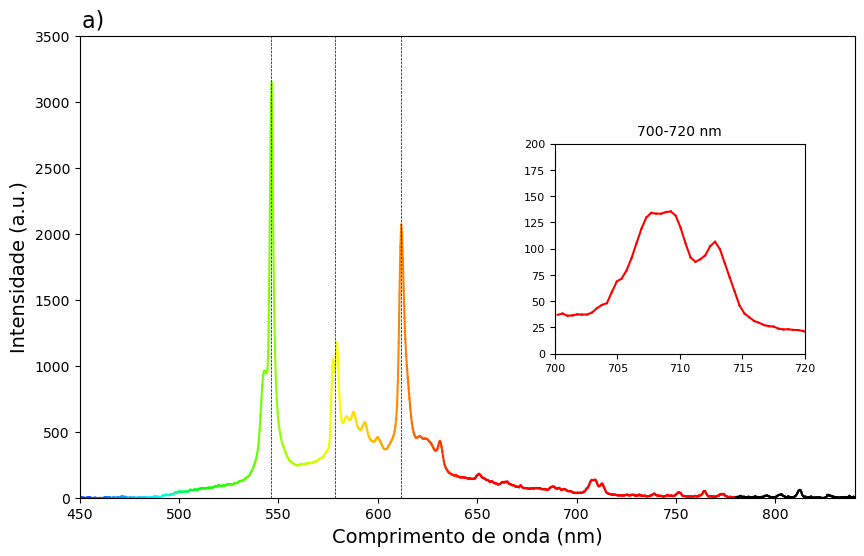

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Inicialização
wavelengths = []
intensities = []

# Leitura de Dados baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_vis_nir sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')  # Cor amarela
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))

    # Título e rótulos
    plt.title('a)                                                                                                         ', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Adicionar linhas verticais
    plt.axvline(x=546.3, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=578.5, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=611.5, color='black', linestyle='--', linewidth=0.5)
    
    # Limites dos eixos
    plt.xlim(450, 840)
    plt.ylim(0, 3500)

    # Criar o gráfico inset entre 700 e 720 nm
    ax_inset = plt.axes([0.6, 0.35, 0.25, 0.35])  # Definir a posição e o tamanho do gráfico inset
    for i in range(len(wavelengths) - 1):
        if 700 <= wavelengths[i] <= 720:
            if 589 <= wavelengths[i] <= 589.5:  # Cor amarela próxima de 589 nm
                ax_inset.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')
            else:
                ax_inset.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))

    # Configurações do gráfico inset
    ax_inset.set_xlim(700, 720)
    ax_inset.set_ylim(0, 200)
    ax_inset.set_title('700-720 nm', fontsize=10)
    ax_inset.tick_params(axis='both', which='major', labelsize=8)

    # Exibir o gráfico
    plt.show()

#### Halogénio UV_VIS

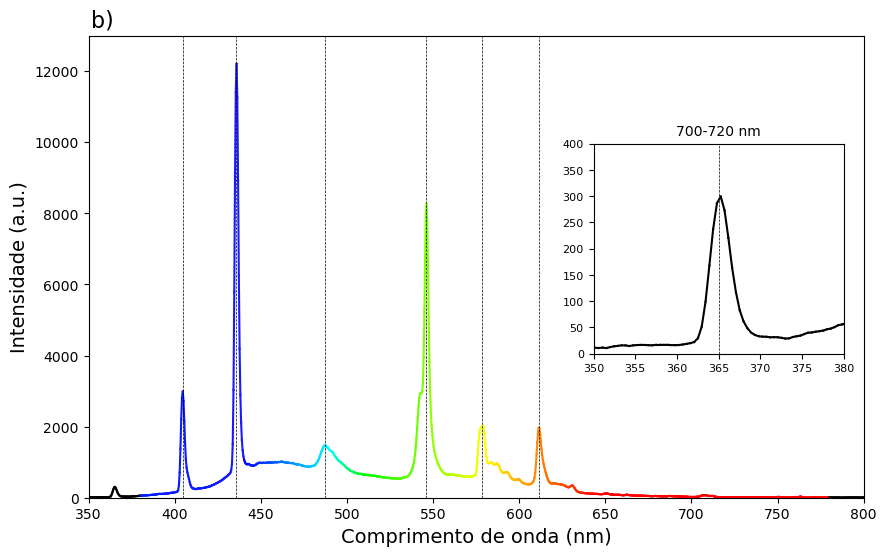

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Inicialização
wavelengths = []
intensities = []

# Leitura de Dados baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_uv_vis sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')  # Cor amarela
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))

    # Título e rótulos
    plt.title('b)                                                                                                         ', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)
    
    # Adicionar linhas verticais
    plt.axvline(x=546.1, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=578.5, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=611.5, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=435.7, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=404.5, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=487, color='black', linestyle='--', linewidth=0.5)

    # Limites dos eixos
    plt.xlim(350, 800)
    plt.ylim(0, 13000)
    
    # Criar o gráfico inset entre 350 e 380 nm
    ax_inset = plt.axes([0.63, 0.35, 0.25, 0.35])  # Definir a posição e o tamanho do gráfico inset
    for i in range(len(wavelengths) - 1):
        if 350 <= wavelengths[i] <= 380:
            if 589 <= wavelengths[i] <= 589.5:  # Cor amarela próxima de 589 nm
                ax_inset.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200')
            else:
                ax_inset.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]))

    # Configurações do gráfico inset
    ax_inset.set_xlim(350, 380)
    ax_inset.set_ylim(0, 400)
    ax_inset.set_title('700-720 nm', fontsize=10)
    ax_inset.tick_params(axis='both', which='major', labelsize=8)
    ax_inset.axvline(x=365, color='black', linestyle='--', linewidth=0.5)

    # Exibir o gráfico
    plt.show()

### Filtros

#### Laranja

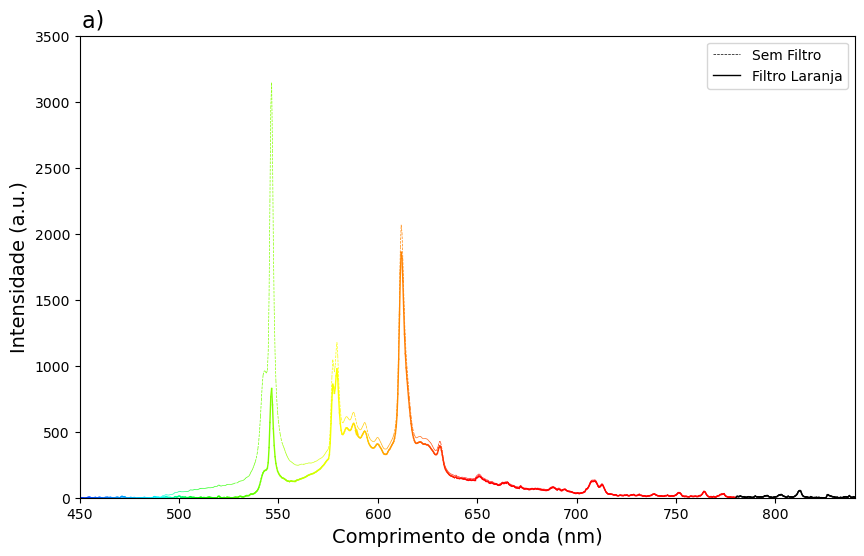

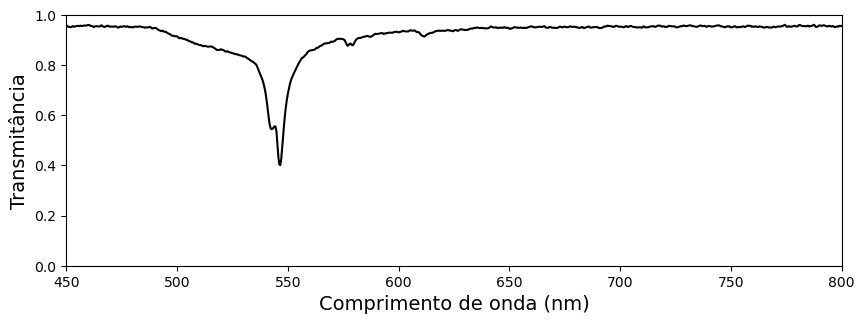

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura do primeiro arquivo baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_vis_nir sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo 'halogenio_vis_nir sem filtro.txt' não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas do primeiro arquivo com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200', linestyle='--', linewidth=0.5, label='Vizinhança de 589 nm' if i == 0 else "")  # Cor amarela tracejada
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color=wavelength_to_rgb(wavelengths[i]), linestyle='--', linewidth=0.5, label='Sem Filtro' if i == 0 else "")  # Cor tracejada

    # Leitura do segundo arquivo
    wavelengths_laranja = []
    intensities_laranja = []

    try:
        with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_vis_nir filtro laranja.txt", "r") as data:
            read_data = False  # Sinalizador para começar a ler após o cabeçalho
            for line in data:
                # Verifica se chegamos à linha de dados
                if line.startswith("Pixel"):
                    read_data = True  # Inicia a leitura de dados na próxima linha
                    continue
                if read_data:
                    linha = line.strip().split()  # Divide por espaços ou tabulações
                    if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                        try:
                            wavelength = float(linha[1])  # Coluna 2 é Wavelength
                            intensity = float(linha[2])  # Coluna 3 é Intensity
                            wavelengths_laranja.append(wavelength)
                            intensities_laranja.append(intensity)
                        except ValueError:
                            print(f"Erro ao converter para float: {linha}")

    except FileNotFoundError:
        print("Arquivo 'halogenio_vis_nir filtro laranja.txt' não encontrado. Verifique o caminho.")

    # Verifica se os dados do segundo arquivo foram carregados corretamente
    if wavelengths_laranja and intensities_laranja:
        wavelengths_laranja = np.array(wavelengths_laranja)
        intensities_laranja = np.array(intensities_laranja)

        # Filtrar os valores na faixa de 900 a 1100 nm
        faixa_mask_laranja = (wavelengths_laranja >= 900) & (wavelengths_laranja <= 1100)
        media_faixa_laranja = np.mean(intensities_laranja[faixa_mask_laranja])  # Calcula a média das intensidades nessa faixa

        # Subtrair a média de todas as intensidades
        intensities_corrigidas_laranja = intensities_laranja - media_faixa_laranja

        # Calcular a transmitância e densidade ótica
        valid_mask = intensities_corrigidas > 0  # Máscara para intensidades válidas
        transmitancia = np.zeros_like(intensities_laranja)
        transmitancia = intensities_laranja / intensities
        densidade_otica = np.zeros_like(transmitancia)
        densidade_otica[transmitancia > 0] = -np.log10(transmitancia[transmitancia > 0])
        densidade_otica[transmitancia == 0] = np.inf  # A densidade óptica é infinita onde a transmitância é zero

        # Plotar os segmentos de linhas do segundo arquivo com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths_laranja) - 1):
            # Aplique a cor amarela a 589 nm
            if 589 <= wavelengths_laranja[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], color='#ffe200', linewidth=2, label='Vizinhança de 589 nm (Laranja)' if i == 0 else "")  # Cor amarela
            else:
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], color=wavelength_to_rgb(wavelengths_laranja[i]), linewidth=1, label='Filtro Laranja' if i == 0 else "")

    # Adicionar legenda
    plt.legend(loc='upper right')

    # Título e rótulos
    plt.title('a)                                                                                                         ', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Limites dos eixos
    plt.xlim(450, 840)
    plt.ylim(0, 3500)

    # Exibir o gráfico
    plt.show()

    # Gráfico de Transmitância
    plt.figure(figsize=(8.75, 6))
    plt.subplot(2, 1, 1)
    plt.plot(wavelengths_laranja, transmitancia, color='black')
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.xlim(450, 800)
    plt.ylim(0, 1)
    plt.ylabel('Transmitância', fontsize=14)

    plt.tight_layout()
    plt.show()

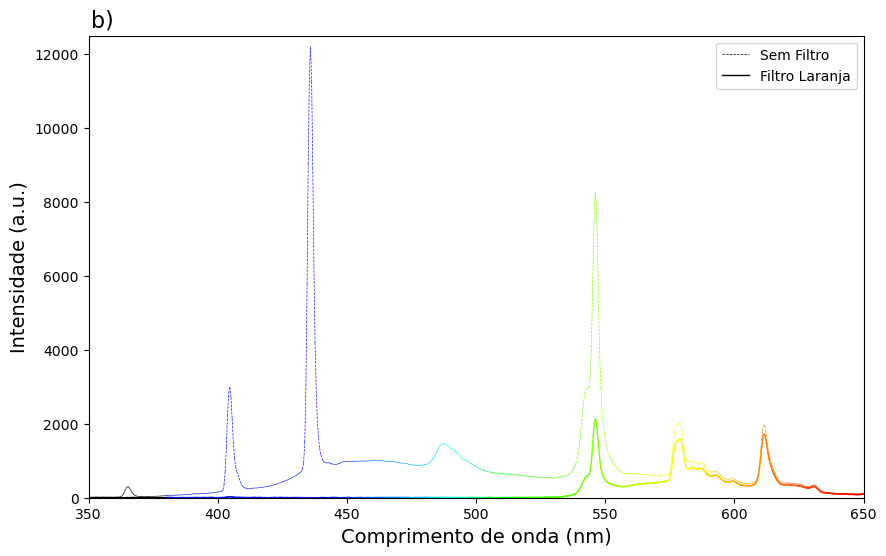

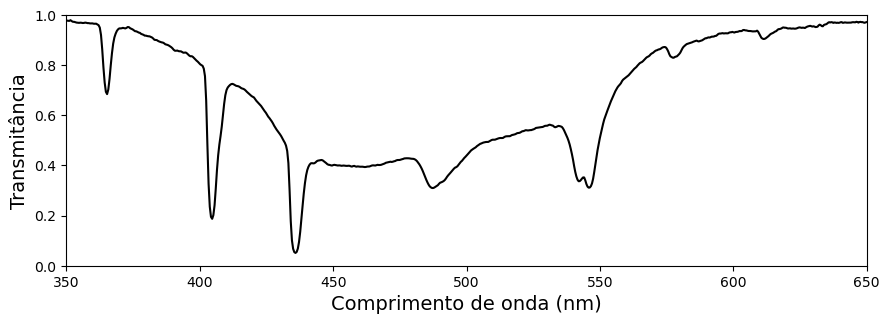

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura do primeiro arquivo baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_uv_vis sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo 'halogenio_vis_nir sem filtro.txt' não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas do primeiro arquivo com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200', linestyle='--', linewidth=0.5)  # Cor amarela tracejada
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], label='Sem Filtro' if i == 0 else "", color=wavelength_to_rgb(wavelengths[i]), linestyle='--', linewidth=0.5)  # Cor tracejada

    # Leitura do segundo arquivo
    wavelengths_laranja = []
    intensities_laranja = []

    try:
        with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_uv_vis filtro laranja.txt", "r") as data:
            read_data = False  # Sinalizador para começar a ler após o cabeçalho
            for line in data:
                # Verifica se chegamos à linha de dados
                if line.startswith("Pixel"):
                    read_data = True  # Inicia a leitura de dados na próxima linha
                    continue
                if read_data:
                    linha = line.strip().split()  # Divide por espaços ou tabulações
                    if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                        try:
                            wavelength = float(linha[1])  # Coluna 2 é Wavelength
                            intensity = float(linha[2])  # Coluna 3 é Intensity
                            wavelengths_laranja.append(wavelength)
                            intensities_laranja.append(intensity)
                        except ValueError:
                            print(f"Erro ao converter para float: {linha}")

    except FileNotFoundError:
        print("Arquivo 'halogenio_vis_nir filtro laranja.txt' não encontrado. Verifique o caminho.")

    # Verifica se os dados do segundo arquivo foram carregados corretamente
    if wavelengths_laranja and intensities_laranja:
        wavelengths_laranja = np.array(wavelengths_laranja)
        intensities_laranja = np.array(intensities_laranja)

        # Filtrar os valores na faixa de 900 a 1100 nm
        faixa_mask_laranja = (wavelengths_laranja >= 900) & (wavelengths_laranja <= 1100)
        media_faixa_laranja = np.mean(intensities_laranja[faixa_mask_laranja])  # Calcula a média das intensidades nessa faixa

        # Subtrair a média de todas as intensidades
        intensities_corrigidas_laranja = intensities_laranja - media_faixa_laranja

        # Calcular a transmitância e densidade ótica
        # Verifica se intensities_corrigidas não é zero para evitar divisão por zero
        valid_mask = intensities_corrigidas > 0  # Máscara para intensidades válidas

        # Calcular transmitância apenas onde as intensidades são válidas
        transmitancia = np.zeros_like(intensities_laranja)
        transmitancia = intensities_laranja / intensities

        # A densidade óptica é calculada onde a transmitância é válida
        densidade_otica = np.zeros_like(transmitancia)
        densidade_otica[transmitancia > 0] = -np.log10(transmitancia[transmitancia > 0])

        # Atribuir valores onde a transmitância é zero ou não calculável
        densidade_otica[transmitancia == 0] = np.inf  # A densidade óptica é infinita onde a transmitância é zero

        # Plotar os segmentos de linhas do segundo arquivo com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths_laranja) - 1):
            # Aplique a cor amarela a 589 nm
            if 589 <= wavelengths_laranja[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], color='#ffe200', linewidth=2)  # Cor amarela
            else:
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], label='Filtro Laranja' if i == 0 else "", color=wavelength_to_rgb(wavelengths_laranja[i]), linewidth=1)

    # Adicionar legenda
    plt.legend(loc='upper right')
    
    # Título e rótulos
    plt.title('b)                                                                                                         ', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Limites dos eixos
    plt.xlim(350, 650)
    plt.ylim(0, 12500)

    # Exibir o gráfico
    plt.show()

    # Exibir transmitância e densidade ótica
    plt.figure(figsize=(9, 6))
    plt.subplot(2, 1, 1)
    plt.plot(wavelengths_laranja, transmitancia, color='black')
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.xlim(350, 650)
    plt.ylim(0,1)
    plt.ylabel('Transmitância', fontsize=14)

    plt.tight_layout()
    plt.show()

#### Verde

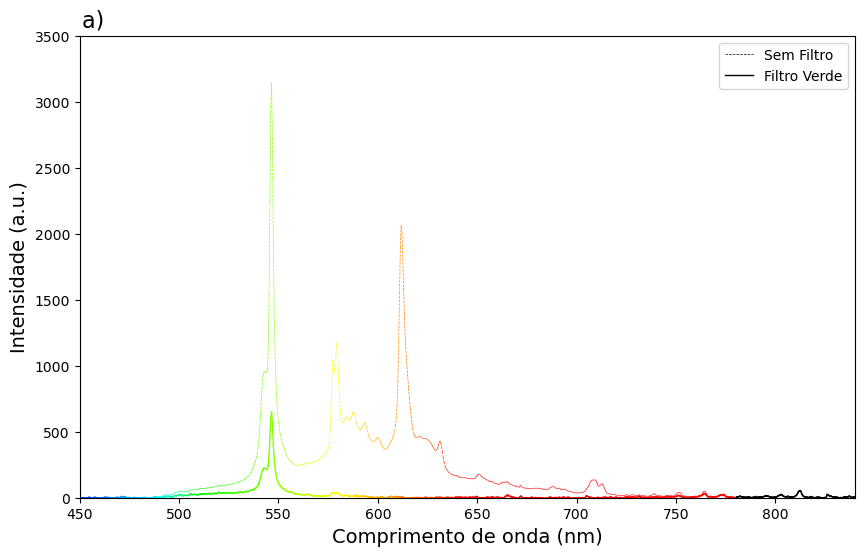

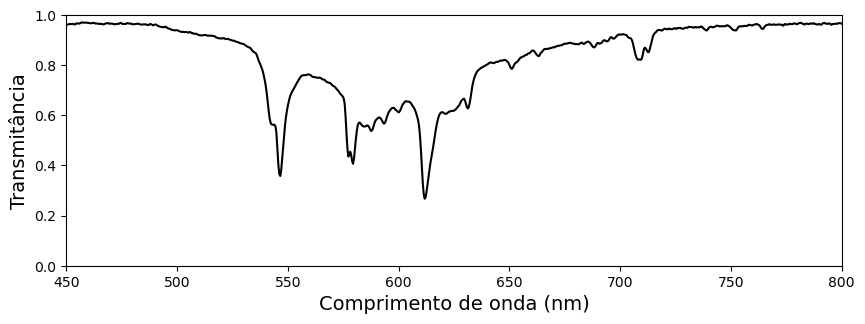

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura do primeiro arquivo baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_vis_nir sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo 'halogenio_vis_nir sem filtro.txt' não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas do primeiro arquivo com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200', linestyle='--', linewidth=0.5)  # Cor amarela tracejada
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], label='Sem Filtro' if i == 0 else "",color=wavelength_to_rgb(wavelengths[i]), linestyle='--', linewidth=0.5)  # Cor tracejada

    # Leitura do segundo arquivo
    wavelengths_laranja = []
    intensities_laranja = []

    try:
        with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_vis_nir filtro verde.txt", "r") as data:
            read_data = False  # Sinalizador para começar a ler após o cabeçalho
            for line in data:
                # Verifica se chegamos à linha de dados
                if line.startswith("Pixel"):
                    read_data = True  # Inicia a leitura de dados na próxima linha
                    continue
                if read_data:
                    linha = line.strip().split()  # Divide por espaços ou tabulações
                    if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                        try:
                            wavelength = float(linha[1])  # Coluna 2 é Wavelength
                            intensity = float(linha[2])  # Coluna 3 é Intensity
                            wavelengths_laranja.append(wavelength)
                            intensities_laranja.append(intensity)
                        except ValueError:
                            print(f"Erro ao converter para float: {linha}")

    except FileNotFoundError:
        print("Arquivo 'halogenio_vis_nir filtro laranja.txt' não encontrado. Verifique o caminho.")

    # Verifica se os dados do segundo arquivo foram carregados corretamente
    if wavelengths_laranja and intensities_laranja:
        wavelengths_laranja = np.array(wavelengths_laranja)
        intensities_laranja = np.array(intensities_laranja)

        # Filtrar os valores na faixa de 900 a 1100 nm
        faixa_mask_laranja = (wavelengths_laranja >= 900) & (wavelengths_laranja <= 1100)
        media_faixa_laranja = np.mean(intensities_laranja[faixa_mask_laranja])  # Calcula a média das intensidades nessa faixa

        # Subtrair a média de todas as intensidades
        intensities_corrigidas_laranja = intensities_laranja - media_faixa_laranja

        # Calcular a transmitância e densidade ótica
        # Verifica se intensities_corrigidas não é zero para evitar divisão por zero
        valid_mask = intensities_corrigidas > 0  # Máscara para intensidades válidas

        # Calcular transmitância apenas onde as intensidades são válidas
        transmitancia = np.zeros_like(intensities_laranja)
        transmitancia = intensities_laranja / intensities

        # A densidade óptica é calculada onde a transmitância é válida
        densidade_otica = np.zeros_like(transmitancia)
        densidade_otica[transmitancia > 0] = -np.log10(transmitancia[transmitancia > 0])

        # Atribuir valores onde a transmitância é zero ou não calculável
        densidade_otica[transmitancia == 0] = np.inf  # A densidade óptica é infinita onde a transmitância é zero

        # Plotar os segmentos de linhas do segundo arquivo com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths_laranja) - 1):
            # Aplique a cor amarela a 589 nm
            if 589 <= wavelengths_laranja[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], color='#ffe200', linewidth=2)  # Cor amarela
            else:
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2],label='Filtro Verde' if i == 0 else "", color=wavelength_to_rgb(wavelengths_laranja[i]), linewidth=1)
    
    # Adicionar legenda
    plt.legend(loc='upper right')
    

    # Título e rótulos
    plt.title('a)                                                                                                         ', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Limites dos eixos
    plt.xlim(450, 840)
    plt.ylim(0, 3500)

    # Exibir o gráfico
    plt.show()

    # Exibir transmitância e densidade ótica
    plt.figure(figsize=(8.75, 6))
    plt.subplot(2, 1, 1)
    plt.plot(wavelengths_laranja, transmitancia, color='black')
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.xlim(450, 800)
    plt.ylim(0,1)
    plt.ylabel('Transmitância', fontsize=14)

    plt.tight_layout()
    plt.show()

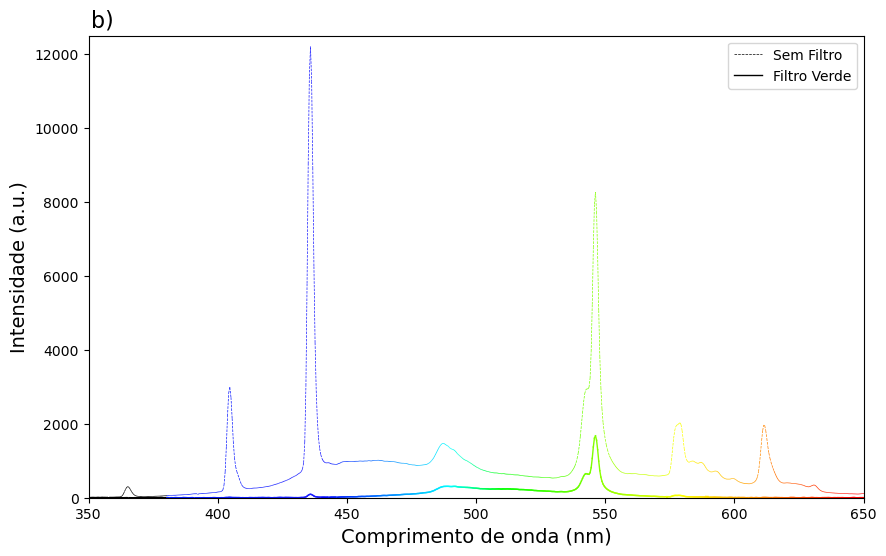

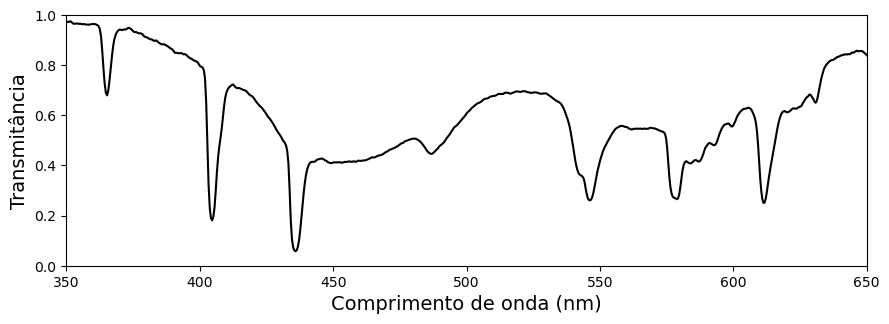

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura do primeiro arquivo baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_uv_vis sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo 'halogenio_vis_nir sem filtro.txt' não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas do primeiro arquivo com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200', linestyle='--', linewidth=0.5)  # Cor amarela tracejada
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], label='Sem Filtro' if i == 0 else "", color=wavelength_to_rgb(wavelengths[i]), linestyle='--', linewidth=0.5)  # Cor tracejada

    # Leitura do segundo arquivo
    wavelengths_laranja = []
    intensities_laranja = []

    try:
        with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_uv_vis filtro verde.txt", "r") as data:
            read_data = False  # Sinalizador para começar a ler após o cabeçalho
            for line in data:
                # Verifica se chegamos à linha de dados
                if line.startswith("Pixel"):
                    read_data = True  # Inicia a leitura de dados na próxima linha
                    continue
                if read_data:
                    linha = line.strip().split()  # Divide por espaços ou tabulações
                    if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                        try:
                            wavelength = float(linha[1])  # Coluna 2 é Wavelength
                            intensity = float(linha[2])  # Coluna 3 é Intensity
                            wavelengths_laranja.append(wavelength)
                            intensities_laranja.append(intensity)
                        except ValueError:
                            print(f"Erro ao converter para float: {linha}")

    except FileNotFoundError:
        print("Arquivo 'halogenio_vis_nir filtro laranja.txt' não encontrado. Verifique o caminho.")

    # Verifica se os dados do segundo arquivo foram carregados corretamente
    if wavelengths_laranja and intensities_laranja:
        wavelengths_laranja = np.array(wavelengths_laranja)
        intensities_laranja = np.array(intensities_laranja)

        # Filtrar os valores na faixa de 900 a 1100 nm
        faixa_mask_laranja = (wavelengths_laranja >= 900) & (wavelengths_laranja <= 1100)
        media_faixa_laranja = np.mean(intensities_laranja[faixa_mask_laranja])  # Calcula a média das intensidades nessa faixa

        # Subtrair a média de todas as intensidades
        intensities_corrigidas_laranja = intensities_laranja - media_faixa_laranja

        # Calcular a transmitância e densidade ótica
        # Verifica se intensities_corrigidas não é zero para evitar divisão por zero
        valid_mask = intensities_corrigidas > 0  # Máscara para intensidades válidas

        # Calcular transmitância apenas onde as intensidades são válidas
        transmitancia = np.zeros_like(intensities_laranja)
        transmitancia = intensities_laranja / intensities

        # A densidade óptica é calculada onde a transmitância é válida
        densidade_otica = np.zeros_like(transmitancia)
        densidade_otica[transmitancia > 0] = -np.log10(transmitancia[transmitancia > 0])

        # Atribuir valores onde a transmitância é zero ou não calculável
        densidade_otica[transmitancia == 0] = np.inf  # A densidade óptica é infinita onde a transmitância é zero

        # Plotar os segmentos de linhas do segundo arquivo com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths_laranja) - 1):
            # Aplique a cor amarela a 589 nm
            if 589 <= wavelengths_laranja[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], color='#ffe200', linewidth=2)  # Cor amarela
            else:
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], label='Filtro Verde' if i == 0 else "",  color=wavelength_to_rgb(wavelengths_laranja[i]), linewidth=1)

    # Adicionar legenda
    plt.legend(loc='upper right')
    
    # Título e rótulos
    plt.title('b)                                                                                                         ', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Limites dos eixos
    plt.xlim(350, 650)
    plt.ylim(0, 12500)

    # Exibir o gráfico
    plt.show()

    # Exibir transmitância e densidade ótica
    plt.figure(figsize=(9, 6))
    plt.subplot(2, 1, 1)
    plt.plot(wavelengths_laranja, transmitancia, color='black')
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.xlim(350, 650)
    plt.ylim(0,1)
    plt.ylabel('Transmitância', fontsize=14)

    plt.tight_layout()
    plt.show()

#### Amarelo

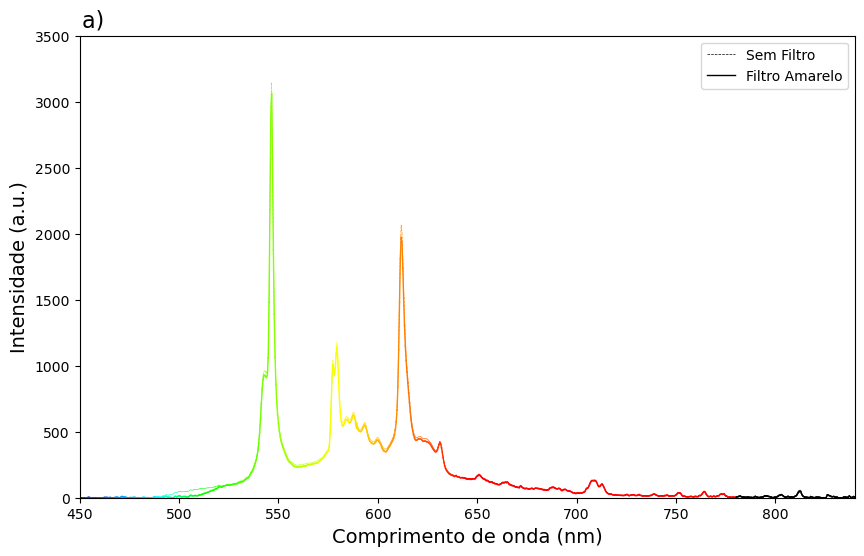

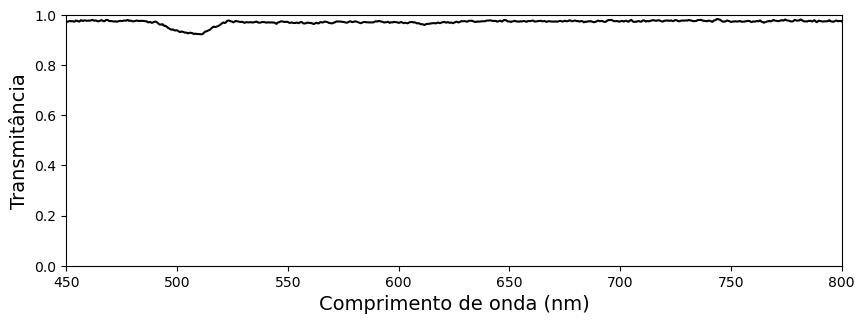

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura do primeiro arquivo baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_vis_nir sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo 'halogenio_vis_nir sem filtro.txt' não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas do primeiro arquivo com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200', linestyle='--', linewidth=0.5)  # Cor amarela tracejada
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], label='Sem Filtro' if i == 0 else "", color=wavelength_to_rgb(wavelengths[i]), linestyle='--', linewidth=0.5)  # Cor tracejada

    # Leitura do segundo arquivo
    wavelengths_laranja = []
    intensities_laranja = []

    try:
        with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_vis_nir filtro amarelo.txt", "r") as data:
            read_data = False  # Sinalizador para começar a ler após o cabeçalho
            for line in data:
                # Verifica se chegamos à linha de dados
                if line.startswith("Pixel"):
                    read_data = True  # Inicia a leitura de dados na próxima linha
                    continue
                if read_data:
                    linha = line.strip().split()  # Divide por espaços ou tabulações
                    if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                        try:
                            wavelength = float(linha[1])  # Coluna 2 é Wavelength
                            intensity = float(linha[2])  # Coluna 3 é Intensity
                            wavelengths_laranja.append(wavelength)
                            intensities_laranja.append(intensity)
                        except ValueError:
                            print(f"Erro ao converter para float: {linha}")

    except FileNotFoundError:
        print("Arquivo 'halogenio_vis_nir filtro laranja.txt' não encontrado. Verifique o caminho.")

    # Verifica se os dados do segundo arquivo foram carregados corretamente
    if wavelengths_laranja and intensities_laranja:
        wavelengths_laranja = np.array(wavelengths_laranja)
        intensities_laranja = np.array(intensities_laranja)

        # Filtrar os valores na faixa de 900 a 1100 nm
        faixa_mask_laranja = (wavelengths_laranja >= 900) & (wavelengths_laranja <= 1100)
        media_faixa_laranja = np.mean(intensities_laranja[faixa_mask_laranja])  # Calcula a média das intensidades nessa faixa

        # Subtrair a média de todas as intensidades
        intensities_corrigidas_laranja = intensities_laranja - media_faixa_laranja

        # Calcular a transmitância e densidade ótica
        # Verifica se intensities_corrigidas não é zero para evitar divisão por zero
        valid_mask = intensities_corrigidas > 0  # Máscara para intensidades válidas

        # Calcular transmitância apenas onde as intensidades são válidas
        transmitancia = np.zeros_like(intensities_laranja)
        transmitancia = intensities_laranja / intensities

        # A densidade óptica é calculada onde a transmitância é válida
        densidade_otica = np.zeros_like(transmitancia)
        densidade_otica[transmitancia > 0] = -np.log10(transmitancia[transmitancia > 0])

        # Atribuir valores onde a transmitância é zero ou não calculável
        densidade_otica[transmitancia == 0] = np.inf  # A densidade óptica é infinita onde a transmitância é zero

        # Plotar os segmentos de linhas do segundo arquivo com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths_laranja) - 1):
            # Aplique a cor amarela a 589 nm
            if 589 <= wavelengths_laranja[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], color='#ffe200', linewidth=2)  # Cor amarela
            else:
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], label='Filtro Amarelo' if i == 0 else "", color=wavelength_to_rgb(wavelengths_laranja[i]), linewidth=1)

    # Adicionar legenda
    plt.legend(loc='upper right')
    
    # Título e rótulos
    plt.title('a)                                                                                                         ', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Limites dos eixos
    plt.xlim(450, 840)
    plt.ylim(0, 3500)

    # Exibir o gráfico
    plt.show()

    # Exibir transmitância e densidade ótica
    plt.figure(figsize=(8.75, 6))
    plt.subplot(2, 1, 1)
    plt.plot(wavelengths_laranja, transmitancia, color='black')
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.xlim(450, 800)
    plt.ylim(0,1)
    plt.ylabel('Transmitância', fontsize=14)

    plt.tight_layout()
    plt.show()

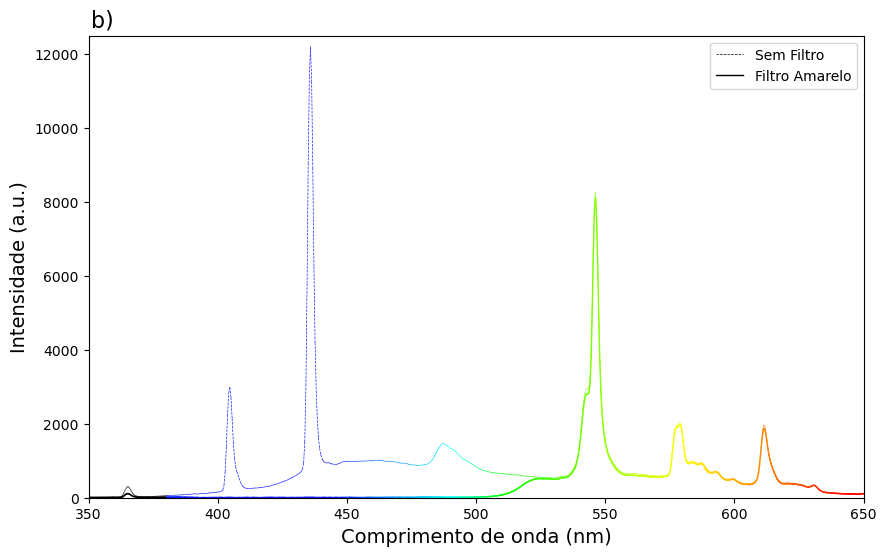

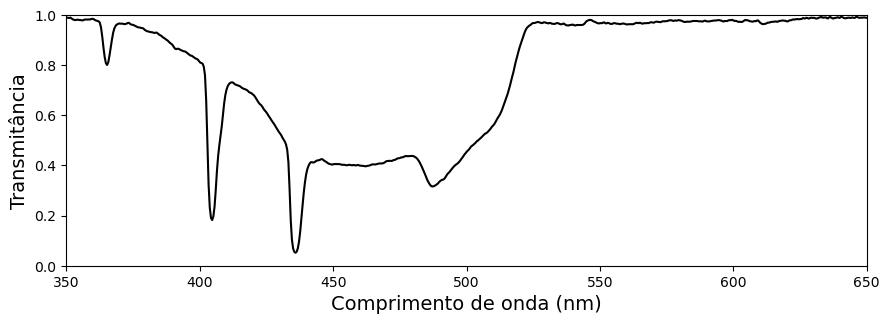

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura do primeiro arquivo baseado no formato do documento
try:
    with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_uv_vis sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo 'halogenio_vis_nir sem filtro.txt' não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas do primeiro arquivo com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200', linestyle='--', linewidth=0.5)  # Cor amarela tracejada
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2],label='Sem Filtro' if i == 0 else "", color=wavelength_to_rgb(wavelengths[i]), linestyle='--', linewidth=0.5)  # Cor tracejada

    # Leitura do segundo arquivo
    wavelengths_laranja = []
    intensities_laranja = []

    try:
        with open("/Users/emanuelmiranda/Desktop/Exp6/Dados/halogenio_uv_vis filtro amarelo.txt", "r") as data:
            read_data = False  # Sinalizador para começar a ler após o cabeçalho
            for line in data:
                # Verifica se chegamos à linha de dados
                if line.startswith("Pixel"):
                    read_data = True  # Inicia a leitura de dados na próxima linha
                    continue
                if read_data:
                    linha = line.strip().split()  # Divide por espaços ou tabulações
                    if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                        try:
                            wavelength = float(linha[1])  # Coluna 2 é Wavelength
                            intensity = float(linha[2])  # Coluna 3 é Intensity
                            wavelengths_laranja.append(wavelength)
                            intensities_laranja.append(intensity)
                        except ValueError:
                            print(f"Erro ao converter para float: {linha}")

    except FileNotFoundError:
        print("Arquivo 'halogenio_vis_nir filtro laranja.txt' não encontrado. Verifique o caminho.")

    # Verifica se os dados do segundo arquivo foram carregados corretamente
    if wavelengths_laranja and intensities_laranja:
        wavelengths_laranja = np.array(wavelengths_laranja)
        intensities_laranja = np.array(intensities_laranja)

        # Filtrar os valores na faixa de 900 a 1100 nm
        faixa_mask_laranja = (wavelengths_laranja >= 900) & (wavelengths_laranja <= 1100)
        media_faixa_laranja = np.mean(intensities_laranja[faixa_mask_laranja])  # Calcula a média das intensidades nessa faixa

        # Subtrair a média de todas as intensidades
        intensities_corrigidas_laranja = intensities_laranja - media_faixa_laranja

        # Calcular a transmitância e densidade ótica
        # Verifica se intensities_corrigidas não é zero para evitar divisão por zero
        valid_mask = intensities_corrigidas > 0  # Máscara para intensidades válidas

        # Calcular transmitância apenas onde as intensidades são válidas
        transmitancia = np.zeros_like(intensities_laranja)
        transmitancia = intensities_laranja / intensities

        # A densidade óptica é calculada onde a transmitância é válida
        densidade_otica = np.zeros_like(transmitancia)
        densidade_otica[transmitancia > 0] = -np.log10(transmitancia[transmitancia > 0])

        # Atribuir valores onde a transmitância é zero ou não calculável
        densidade_otica[transmitancia == 0] = np.inf  # A densidade óptica é infinita onde a transmitância é zero

        # Plotar os segmentos de linhas do segundo arquivo com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths_laranja) - 1):
            # Aplique a cor amarela a 589 nm
            if 589 <= wavelengths_laranja[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], color='#ffe200', linewidth=2)  # Cor amarela
            else:
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2],label='Filtro Amarelo' if i == 0 else "", color=wavelength_to_rgb(wavelengths_laranja[i]), linewidth=1)

    # Adicionar legenda
    plt.legend(loc='upper right')
    
    # Título e rótulos
    plt.title('b)                                                                                                         ', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Limites dos eixos
    plt.xlim(350, 650)
    plt.ylim(0, 12500)

    # Exibir o gráfico
    plt.show()

    # Exibir transmitância e densidade ótica
    plt.figure(figsize=(9, 6))
    plt.subplot(2, 1, 1)
    plt.plot(wavelengths_laranja, transmitancia, color='black')
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.xlim(350, 650)
    plt.ylim(0,1)
    plt.ylabel('Transmitância', fontsize=14)

    plt.tight_layout()
    plt.show()

#### Rosa

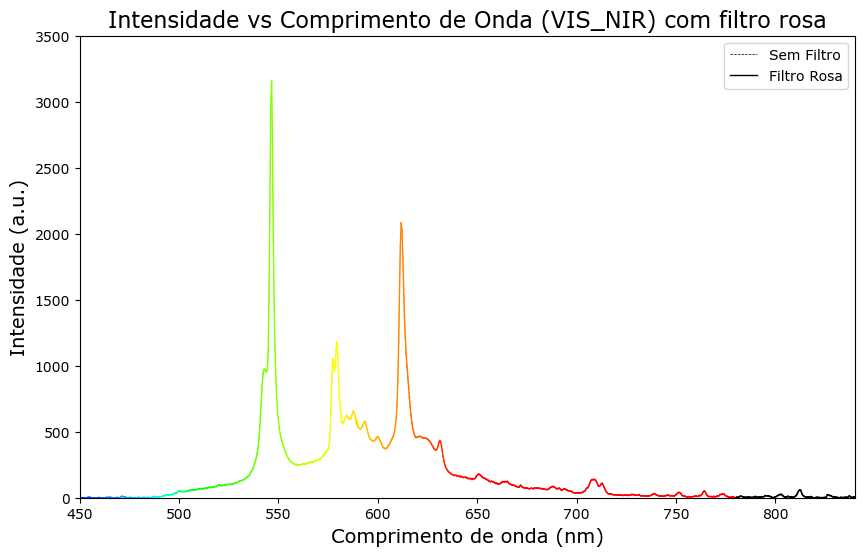

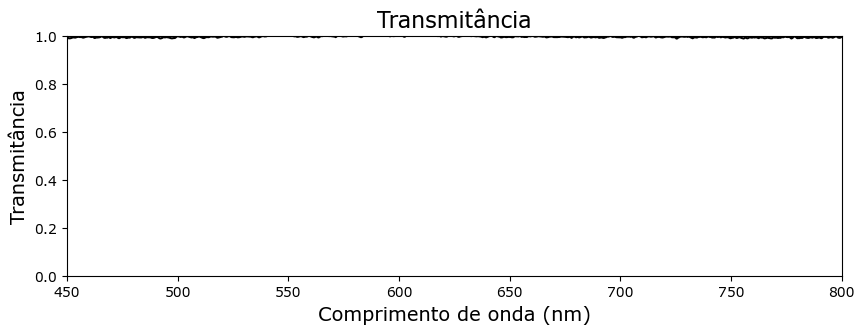

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura do primeiro arquivo baseado no formato do documento
try:
    with open("halogenio_vis_nir sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo 'halogenio_vis_nir sem filtro.txt' não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas do primeiro arquivo com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200', linestyle='--', linewidth=0.5)  # Cor amarela tracejada
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2],label='Sem Filtro' if i == 0 else "", color=wavelength_to_rgb(wavelengths[i]), linestyle='--', linewidth=0.5)  # Cor tracejada

    # Leitura do segundo arquivo
    wavelengths_laranja = []
    intensities_laranja = []

    try:
        with open("halogenio_vis_nir filtro rosa.txt", "r") as data:
            read_data = False  # Sinalizador para começar a ler após o cabeçalho
            for line in data:
                # Verifica se chegamos à linha de dados
                if line.startswith("Pixel"):
                    read_data = True  # Inicia a leitura de dados na próxima linha
                    continue
                if read_data:
                    linha = line.strip().split()  # Divide por espaços ou tabulações
                    if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                        try:
                            wavelength = float(linha[1])  # Coluna 2 é Wavelength
                            intensity = float(linha[2])  # Coluna 3 é Intensity
                            wavelengths_laranja.append(wavelength)
                            intensities_laranja.append(intensity)
                        except ValueError:
                            print(f"Erro ao converter para float: {linha}")

    except FileNotFoundError:
        print("Arquivo 'halogenio_vis_nir filtro rosa.txt' não encontrado. Verifique o caminho.")

    # Verifica se os dados do segundo arquivo foram carregados corretamente
    if wavelengths_laranja and intensities_laranja:
        wavelengths_laranja = np.array(wavelengths_laranja)
        intensities_laranja = np.array(intensities_laranja)

        # Filtrar os valores na faixa de 900 a 1100 nm
        faixa_mask_laranja = (wavelengths_laranja >= 900) & (wavelengths_laranja <= 1100)
        media_faixa_laranja = np.mean(intensities_laranja[faixa_mask_laranja])  # Calcula a média das intensidades nessa faixa

        # Subtrair a média de todas as intensidades
        intensities_corrigidas_laranja = intensities_laranja - media_faixa_laranja

        # Calcular a transmitância e densidade ótica
        # Verifica se intensities_corrigidas não é zero para evitar divisão por zero
        valid_mask = intensities_corrigidas > 0  # Máscara para intensidades válidas

        # Calcular transmitância apenas onde as intensidades são válidas
        transmitancia = np.zeros_like(intensities_laranja)
        transmitancia = intensities_laranja / intensities

        # A densidade óptica é calculada onde a transmitância é válida
        densidade_otica = np.zeros_like(transmitancia)
        densidade_otica[transmitancia > 0] = -np.log10(transmitancia[transmitancia > 0])

        # Atribuir valores onde a transmitância é zero ou não calculável
        densidade_otica[transmitancia == 0] = np.inf  # A densidade óptica é infinita onde a transmitância é zero

        # Plotar os segmentos de linhas do segundo arquivo com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths_laranja) - 1):
            # Aplique a cor amarela a 589 nm
            if 589 <= wavelengths_laranja[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], color='#ffe200', linewidth=2)  # Cor amarela
            else:
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], label='Filtro Rosa' if i == 0 else "", color=wavelength_to_rgb(wavelengths_laranja[i]), linewidth=1)

    # Adicionar legenda
    plt.legend(loc='upper right')
    
    # Título e rótulos
    plt.title('Intensidade vs Comprimento de Onda (VIS_NIR) com filtro rosa', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Limites dos eixos
    plt.xlim(450, 840)
    plt.ylim(0, 3500)

    # Exibir o gráfico
    plt.show()

    # Exibir transmitância e densidade ótica
    plt.figure(figsize=(8.75, 6))
    plt.subplot(2, 1, 1)
    plt.plot(wavelengths_laranja, transmitancia, color='black')
    plt.title('Transmitância', fontsize=16, color='black')
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.xlim(450, 800)
    plt.ylim(0,1)
    plt.ylabel('Transmitância', fontsize=14)

    plt.tight_layout()
    plt.show()

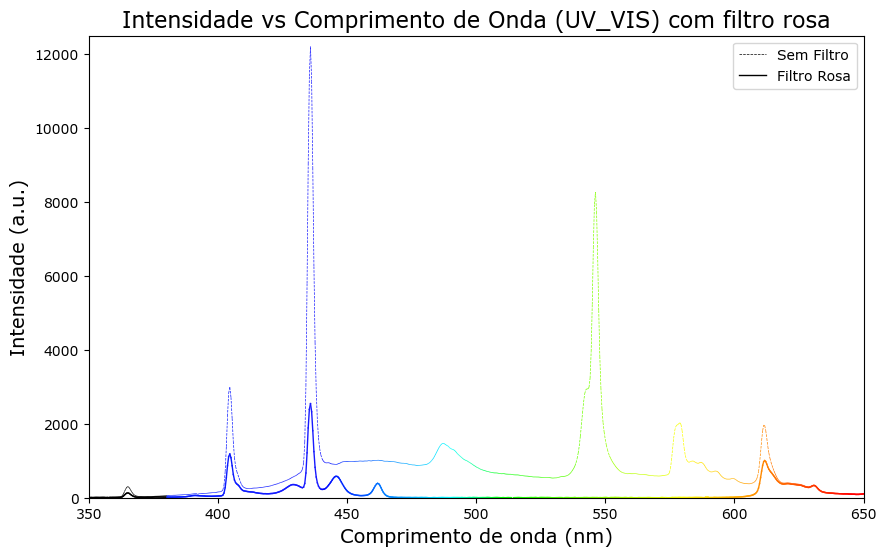

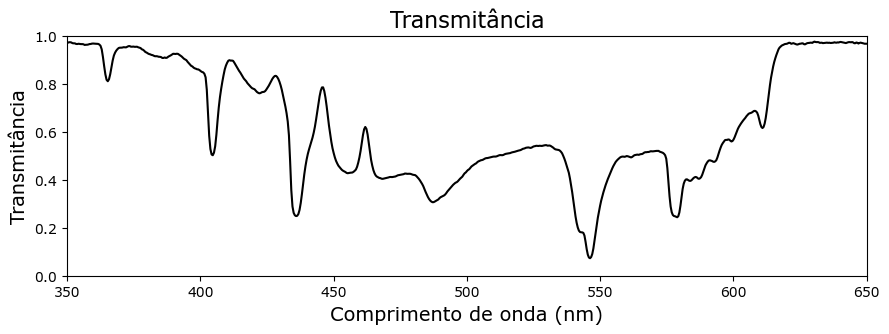

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialização
wavelengths = []
intensities = []

# Leitura do primeiro arquivo baseado no formato do documento
try:
    with open("halogenio_uv_vis sem filtro.txt", "r") as data:
        read_data = False  # Sinalizador para começar a ler após o cabeçalho
        for line in data:
            # Verifica se chegamos à linha de dados
            if line.startswith("Pixel"):
                read_data = True  # Inicia a leitura de dados na próxima linha
                continue
            if read_data:
                linha = line.strip().split()  # Divide por espaços ou tabulações
                if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                    try:
                        wavelength = float(linha[1])  # Coluna 2 é Wavelength
                        intensity = float(linha[2])  # Coluna 3 é Intensity
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        print(f"Erro ao converter para float: {linha}")

except FileNotFoundError:
    print("Arquivo 'halogenio_uv_vis sem filtro.txt' não encontrado. Verifique o caminho.")

# Verifica se os dados foram carregados corretamente
if wavelengths and intensities:
    # Converter listas para arrays para facilitar o cálculo
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)

    # Filtrar os valores na faixa de 900 a 1100 nm
    faixa_mask = (wavelengths >= 900) & (wavelengths <= 1100)
    media_faixa = np.mean(intensities[faixa_mask])  # Calcula a média das intensidades nessa faixa

    # Subtrair a média de todas as intensidades
    intensities_corrigidas = intensities - media_faixa

    # Criar o gráfico principal
    plt.figure(figsize=(10, 6))

    # Função de mapeamento de cores
    def wavelength_to_rgb(wavelength):
        """Converte um comprimento de onda em uma cor RGB"""
        if wavelength < 380:
            return (0, 0, 0)  # Preto para comprimentos de onda abaixo de 380 nm
        elif wavelength < 440:
            return (0.1 * (wavelength - 380) / (440 - 380), 0.1, 1)  # Azul
        elif wavelength < 490:
            return (0, (wavelength - 440) / (490 - 440), 1)  # Azul a verde
        elif wavelength < 510:
            return (0, 1, (510 - wavelength) / (510 - 490))  # Verde
        elif wavelength < 580:
            return ((wavelength - 510) / (580 - 510), 1, 0)  # Verde a amarelo
        elif wavelength < 645:
            return (1, (645 - wavelength) / (645 - 580), 0)  # Amarelo a vermelho
        elif wavelength <= 780:
            return (1, 0, 0)  # Vermelho
        else:
            return (0, 0, 0)  # Preto para comprimentos de onda acima de 780 nm

    # Plotar os segmentos de linhas do primeiro arquivo com cores de acordo com os comprimentos de onda
    for i in range(len(wavelengths) - 1):
        # Aplique a cor amarela a 589 nm
        if 589 <= wavelengths[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], color='#ffe200', linestyle='--', linewidth=0.5)  # Cor amarela tracejada
        else:
            plt.plot(wavelengths[i:i + 2], intensities_corrigidas[i:i + 2], label='Sem Filtro' if i == 0 else "", color=wavelength_to_rgb(wavelengths[i]), linestyle='--', linewidth=0.5)  # Cor tracejada

    # Leitura do segundo arquivo
    wavelengths_laranja = []
    intensities_laranja = []

    try:
        with open("halogenio_uv_vis filtro rosa.txt", "r") as data:
            read_data = False  # Sinalizador para começar a ler após o cabeçalho
            for line in data:
                # Verifica se chegamos à linha de dados
                if line.startswith("Pixel"):
                    read_data = True  # Inicia a leitura de dados na próxima linha
                    continue
                if read_data:
                    linha = line.strip().split()  # Divide por espaços ou tabulações
                    if len(linha) == 3:  # Verifica se há exatamente 3 colunas de dados
                        try:
                            wavelength = float(linha[1])  # Coluna 2 é Wavelength
                            intensity = float(linha[2])  # Coluna 3 é Intensity
                            wavelengths_laranja.append(wavelength)
                            intensities_laranja.append(intensity)
                        except ValueError:
                            print(f"Erro ao converter para float: {linha}")

    except FileNotFoundError:
        print("Arquivo 'halogenio_vis_nir filtro rosa.txt' não encontrado. Verifique o caminho.")

    # Verifica se os dados do segundo arquivo foram carregados corretamente
    if wavelengths_laranja and intensities_laranja:
        wavelengths_laranja = np.array(wavelengths_laranja)
        intensities_laranja = np.array(intensities_laranja)

        # Filtrar os valores na faixa de 900 a 1100 nm
        faixa_mask_laranja = (wavelengths_laranja >= 900) & (wavelengths_laranja <= 1100)
        media_faixa_laranja = np.mean(intensities_laranja[faixa_mask_laranja])  # Calcula a média das intensidades nessa faixa

        # Subtrair a média de todas as intensidades
        intensities_corrigidas_laranja = intensities_laranja - media_faixa_laranja

        # Calcular a transmitância e densidade ótica
        # Verifica se intensities_corrigidas não é zero para evitar divisão por zero
        valid_mask = intensities_corrigidas > 0  # Máscara para intensidades válidas

        # Calcular transmitância apenas onde as intensidades são válidas
        transmitancia = np.zeros_like(intensities_laranja)
        transmitancia = intensities_laranja / intensities

        # A densidade óptica é calculada onde a transmitância é válida
        densidade_otica = np.zeros_like(transmitancia)
        densidade_otica[transmitancia > 0] = -np.log10(transmitancia[transmitancia > 0])

        # Atribuir valores onde a transmitância é zero ou não calculável
        densidade_otica[transmitancia == 0] = np.inf  # A densidade óptica é infinita onde a transmitância é zero

        # Plotar os segmentos de linhas do segundo arquivo com cores de acordo com os comprimentos de onda
        for i in range(len(wavelengths_laranja) - 1):
            # Aplique a cor amarela a 589 nm
            if 589 <= wavelengths_laranja[i] <= 589.5:  # Verifica se está na vizinhança de 589 nm
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2], color='#ffe200', linewidth=2)  # Cor amarela
            else:
                plt.plot(wavelengths_laranja[i:i + 2], intensities_corrigidas_laranja[i:i + 2],label='Filtro Rosa' if i == 0 else "", color=wavelength_to_rgb(wavelengths_laranja[i]), linewidth=1)

    # Adicionar legenda
    plt.legend(loc='upper right')
    
    # Título e rótulos
    plt.title('Intensidade vs Comprimento de Onda (UV_VIS) com filtro rosa', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.ylabel('Intensidade (a.u.)', fontsize=14)

    # Limites dos eixos
    plt.xlim(350, 650)
    plt.ylim(0, 12500)

    # Exibir o gráfico
    plt.show()

    # Exibir transmitância e densidade ótica
    plt.figure(figsize=(9, 6))
    plt.subplot(2, 1, 1)
    plt.plot(wavelengths_laranja, transmitancia, color='black')
    plt.title('Transmitância', fontsize=16)
    plt.xlabel('Comprimento de onda (nm)', fontsize=14)
    plt.xlim(350, 650)
    plt.ylim(0,1)
    plt.ylabel('Transmitância', fontsize=14)

    plt.tight_layout()
    plt.show()

## Fluorescência

In [2]:
import numpy as np

dados = np.zeros([10,3500])
tt, yy = [], []
with open('/Users/emanuelmiranda/Desktop/Exp6/Git/FLUORESCENCIA0.dat') as file:
        for line in file:
            # print(line[0])
            if line[0]=='0':
                yy.append(float(line.split('\t')[1]))
                tt.append(float(line.split('\t')[0].split(':')[2]))
yy = np.array(yy)
dados[0] = yy

for i in range(1,10):
    yy = []
    with open(f'/Users/emanuelmiranda/Desktop/Exp6/Git/FLUORESCENCIA{i}.dat') as file:
        for line in file:
            if line[0]=='0':
                yy.append(float(line.split('\t')[1]))
    yy = np.array(yy)
    dados[i] = yy
            

t0 = np.array(tt)
y00 = np.array(dados[0])
y01 = np.array(dados[1])
y02 = np.array(dados[2])
y03 = np.array(dados[3])
y04 = np.array(dados[4])
y05 = np.array(dados[5])
y06 = np.array(dados[6])
y07 = np.array(dados[7])
y08 = np.array(dados[8])
y09 = np.array(dados[9])

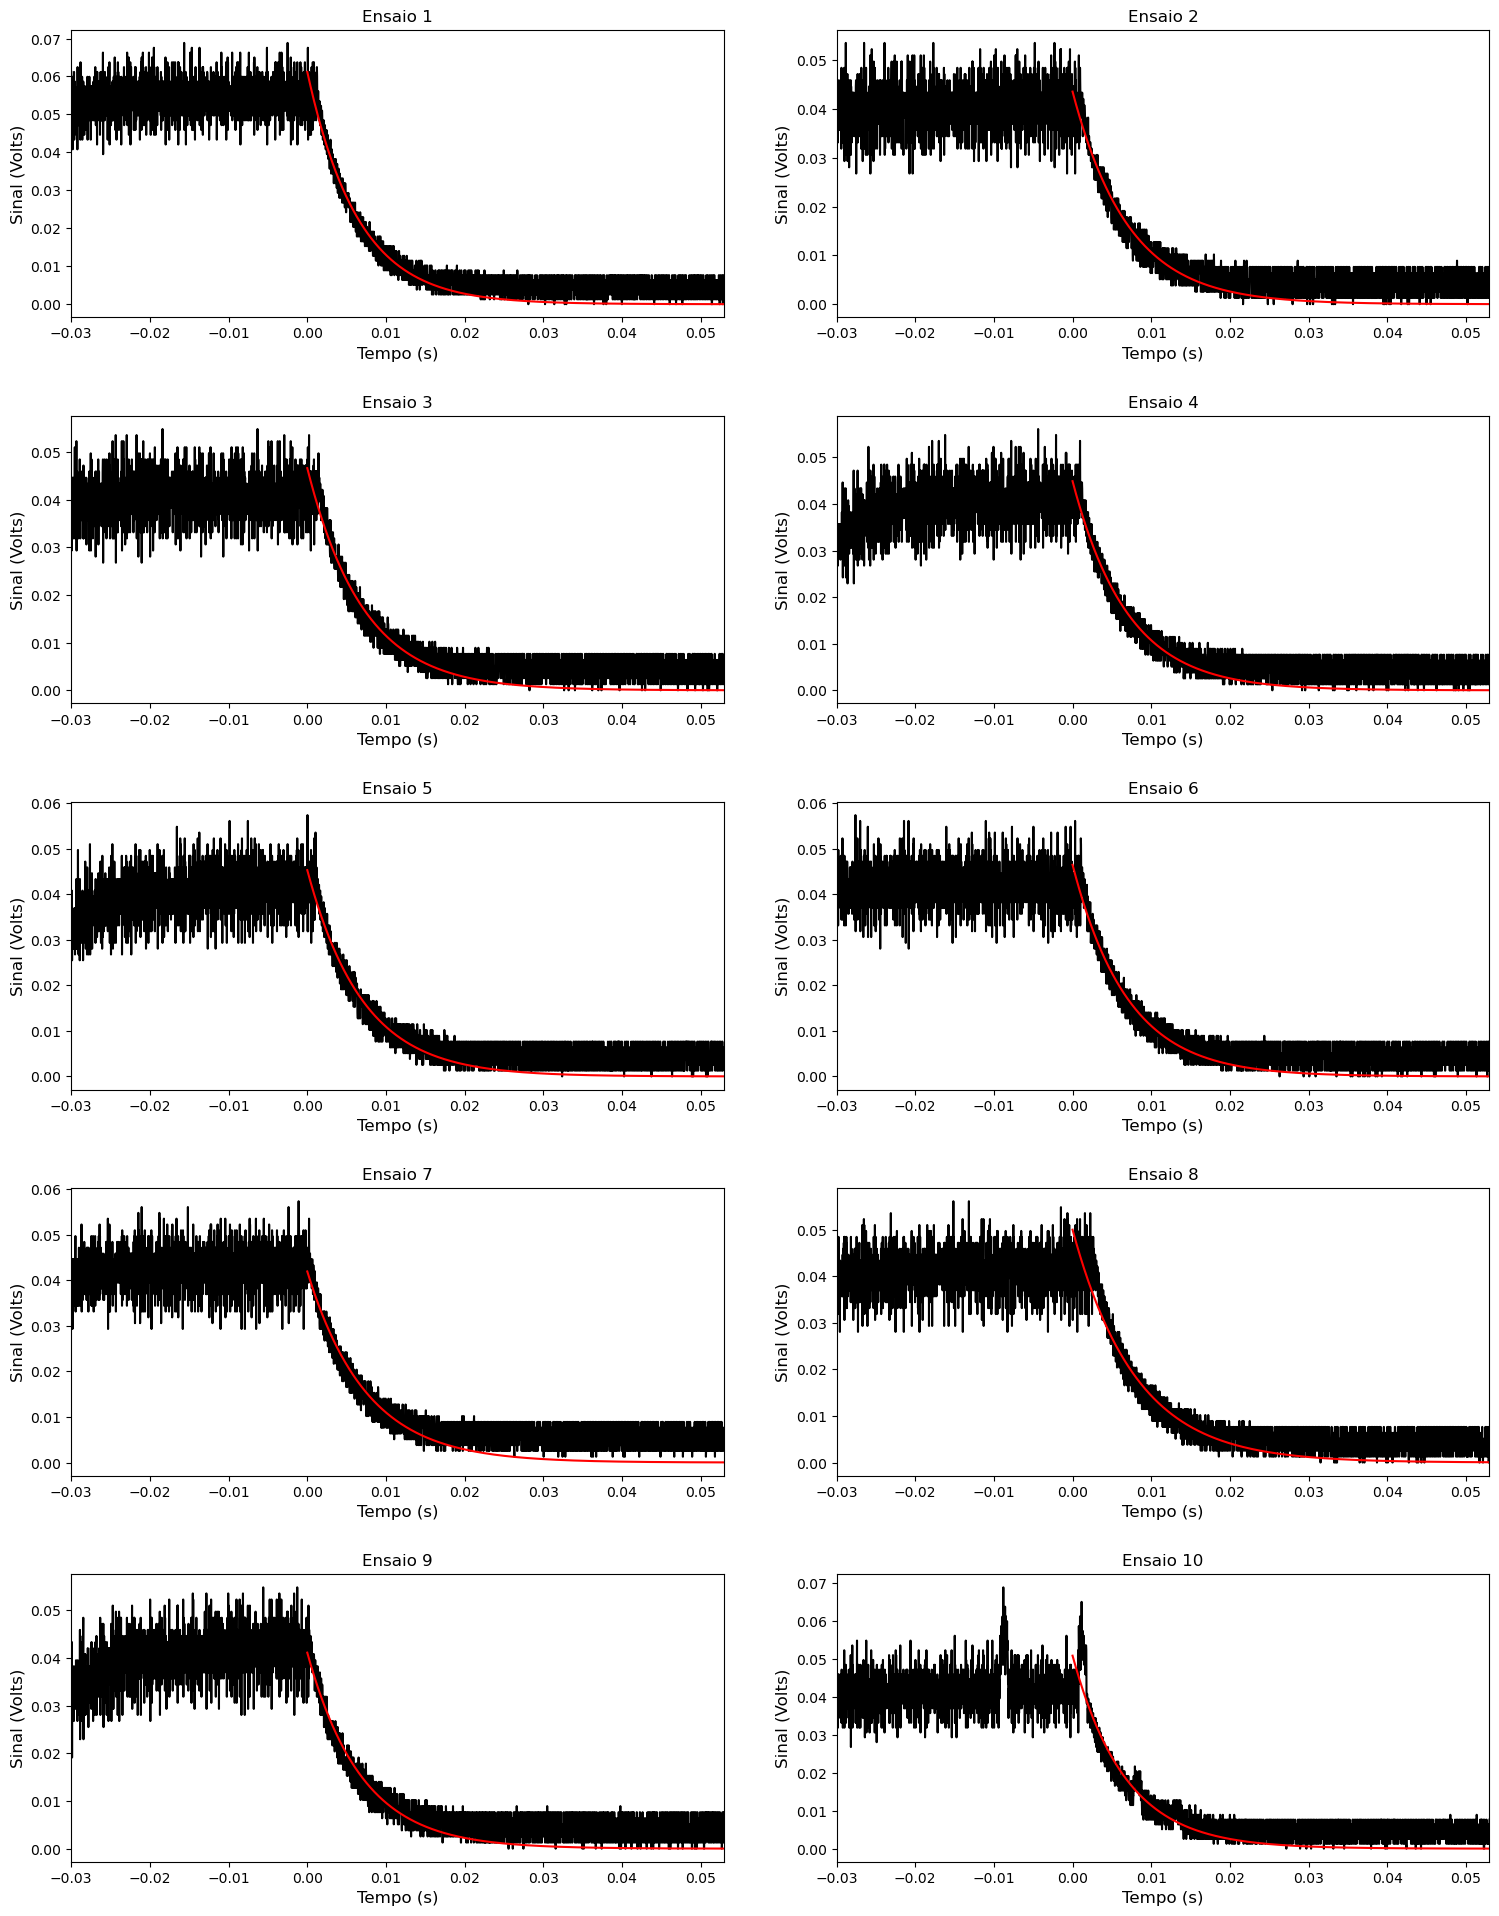

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential_function(x, A, B):
    return A * np.exp(-x*B)

# Definir o número de subplots (10 no total, de y00 a y09)
fig, axs = plt.subplots(5, 2, figsize=(16, 20))  # 5 linhas, 2 colunas de subplots
fig.tight_layout(pad=5.0)

# Lista de dados y00 até y09
y_list = [y00, y01, y02, y03, y04, y05, y06, y07, y08, y09]

# Dicionário para armazenar as listas aj0, aj1, ..., aj9
aj_dict = {}

# Loop para gerar os subplots
for i in range(10):
    t = t0[1300:2000] - t0[1300]  # Janela de tempo
    y = y_list[i][1300:2000] - np.min(y_list[i])  # Ajuste dos dados
    
    params, _ = curve_fit(exponential_function, t, y)  # Ajuste exponencial
    A, B = params  # Extração dos parâmetros A e B
    
    # Gráfico original
    ax = axs[i//2, i%2]  # Posiciona os subplots em formato 5x2
    ax.plot(t0 - t0[1300], y_list[i] - np.min(y_list[i]), color='black', label=f'Ensaio {i+1}')
    
    # Linha de tendência
    ag = A * np.exp(-B * t0)  # Cálculo do ajuste
    aj_dict[f'aj{i}'] = ag  # Armazena a lista ajustada no dicionário com nome aj0, aj1, etc.
    aj_dict[f'A{i}'] = A
    aj_dict[f'B{i}'] = B
    
    # Plotar a linha de tendência
    ax.plot(t0, ag, color='red', label='Linha de tendência')
    
    # Configurações do gráfico
    ax.set_xlim(-0.03, 0.053)
    ax.set_title(f'Ensaio {i+1}')
    
    ax.set_ylabel("Sinal (Volts)", fontsize=12)
    ax.set_xlabel("Tempo (s)", fontsize=12)

plt.show()

# Acessar os valores, por exemplo: aj_dict['aj0'] será equivalente ao aj0

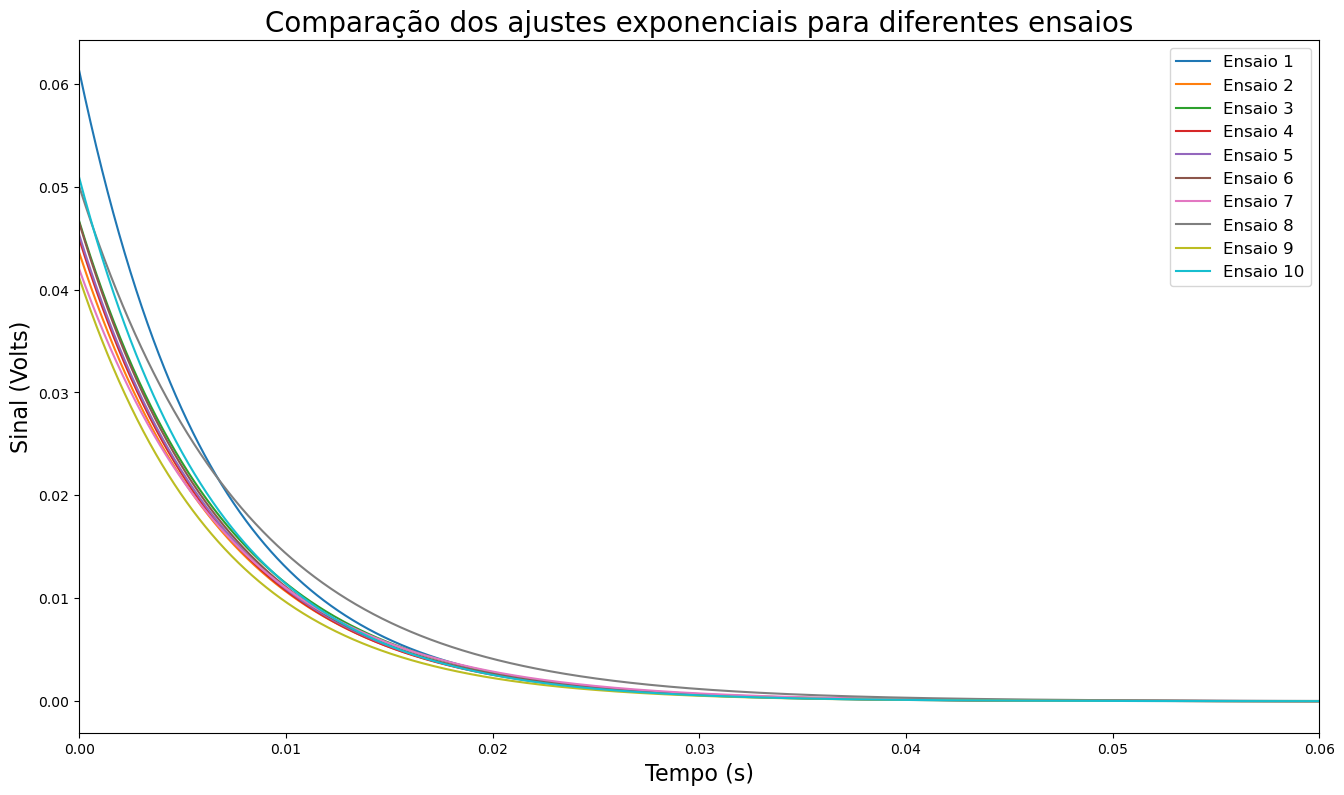

τ = (0.007074515978265044 ± 0.00012744258999601427) s
τ = 0.007074515978265044 s ± 1.8014319338249392 %

Função de decaimento:
I(t) = 0.047195945911540166 e^(-141.79281415348737 t)

Em que:
I0 = (0.047195945911540166 ± 0.0017458502942248166) s = 0.047195945911540166 s ± 3.6991530956855514 %
1/tau = (141.79281415348737 ± 2.452117020528384) s = 141.79281415348737 s ± 1.7293662130677692 %


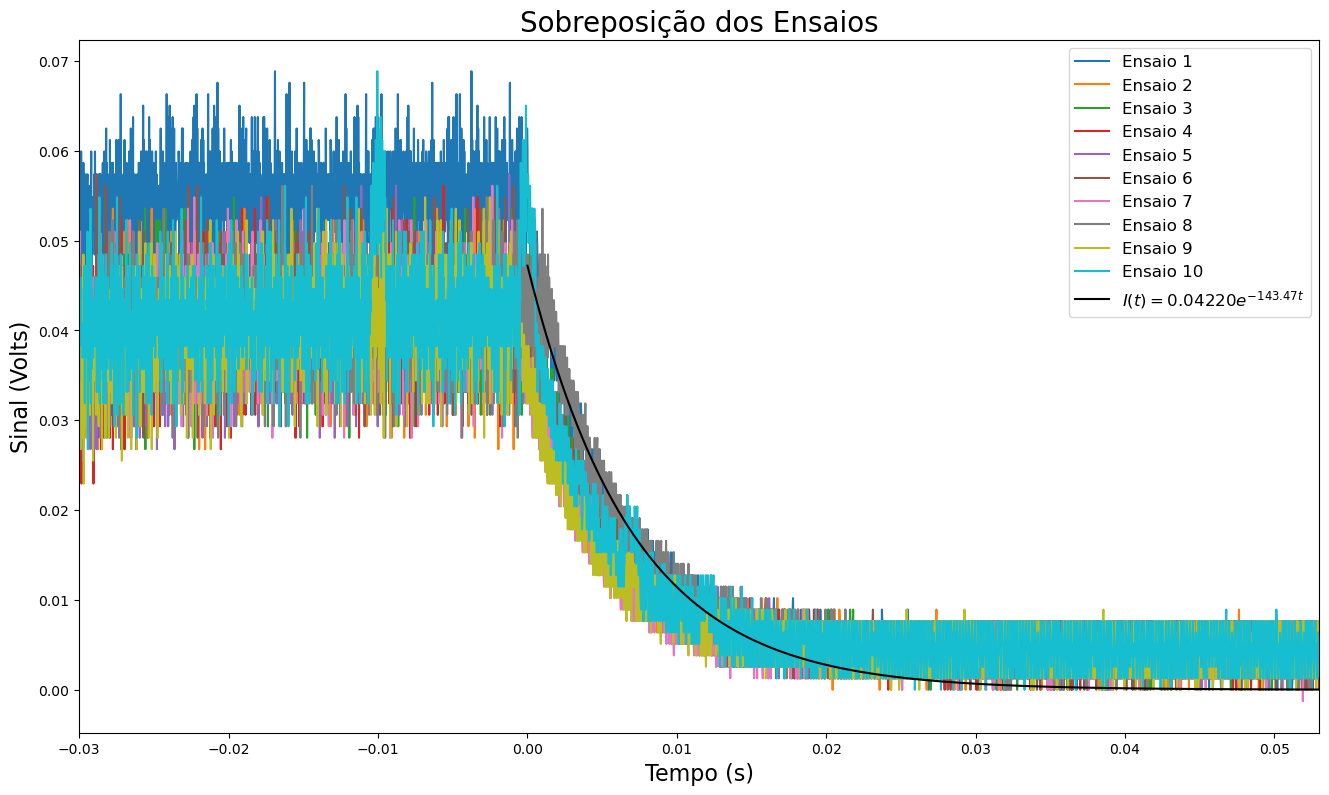

In [7]:
import matplotlib.pyplot as plt

## COMPARAÇÃO

plt.figure(figsize=(16,9))
plt.plot(t0, aj_dict['aj0'], label='Ensaio 1')
plt.plot(t0, aj_dict['aj1'], label='Ensaio 2')
plt.plot(t0, aj_dict['aj2'], label='Ensaio 3')
plt.plot(t0, aj_dict['aj3'], label='Ensaio 4')
plt.plot(t0, aj_dict['aj4'], label='Ensaio 5')
plt.plot(t0, aj_dict['aj5'], label='Ensaio 6')
plt.plot(t0, aj_dict['aj6'], label='Ensaio 7')
plt.plot(t0, aj_dict['aj7'], label='Ensaio 8')
plt.plot(t0, aj_dict['aj8'], label='Ensaio 9')
plt.plot(t0, aj_dict['aj9'], label='Ensaio 10')
plt.title("Comparação dos ajustes exponenciais para diferentes ensaios", fontsize=20)
plt.xlabel("Tempo (s)",fontsize=16)
plt.ylabel("Sinal (Volts)",fontsize=16)
plt.xlim(0 ,0.06)
plt.legend(fontsize=12)
plt.show()

## CALCULAR Tau COM INCERTEZA
Bs = np.array([aj_dict[f'B0'],aj_dict[f'B1'],aj_dict[f'B2'],aj_dict[f'B3'],aj_dict[f'B4'],aj_dict[f'B5'],aj_dict[f'B6'],aj_dict[f'B7'],aj_dict[f'B8'],aj_dict[f'B9']])
taus = 1/Bs
tau = np.average(taus)
u_tau = np.std(taus)/np.sqrt(taus.shape[0])
print(f'τ = ({tau} ± {u_tau}) s')
print(f'τ = {tau} s ± {(u_tau/tau)*100} %')
print()

## FUNÇÃO DE DECAIMENTO (SEM ENSAIO 0)
As = np.array([aj_dict[f'A0'],aj_dict[f'A1'],aj_dict[f'A2'],aj_dict[f'A3'],aj_dict[f'A4'],aj_dict[f'A5'],aj_dict[f'A6'],aj_dict[f'A7'],aj_dict[f'A8'],aj_dict[f'A9']]) # Ao retirar o A0 a incerteza vai de 4 % para 2 %
Bs = np.array([aj_dict[f'B0'],aj_dict[f'B1'],aj_dict[f'B2'],aj_dict[f'B3'],aj_dict[f'B4'],aj_dict[f'B5'],aj_dict[f'B6'],aj_dict[f'B7'],aj_dict[f'B8'],aj_dict[f'B9']])
A = np.average(As)
B = np.average(Bs)
u_A = np.std(As)/np.sqrt(As.shape[0])
u_B = np.std(Bs)/np.sqrt(Bs.shape[0])
print(f'Função de decaimento:')
print(f'I(t) = {A} e^(-{B} t)')
print()
print('Em que:')
print(f'I0 = ({A} ± {u_A}) s = {A} s ± {(u_A/A)*100} %')
print(f'1/tau = ({B} ± {u_B}) s = {B} s ± {(u_B/B)*100} %')

plt.figure(figsize=(16,9))
plt.plot(t0 - t0[1350], dados[0] - np.min(y00), label="Ensaio 1")
plt.plot(t0 - t0[1350], dados[1] - np.min(y00), label="Ensaio 2")
plt.plot(t0 - t0[1350], dados[2] - np.min(y00), label="Ensaio 3")
plt.plot(t0 - t0[1350], dados[3] - np.min(y00), label="Ensaio 4")
plt.plot(t0 - t0[1350], dados[4] - np.min(y00), label="Ensaio 5")
plt.plot(t0 - t0[1350], dados[5] - np.min(y00), label="Ensaio 6")
plt.plot(t0 - t0[1350], dados[6] - np.min(y00), label="Ensaio 7")
plt.plot(t0 - t0[1350], dados[7] - np.min(y00), label="Ensaio 8")
plt.plot(t0 - t0[1350], dados[8] - np.min(y00), label="Ensaio 9")
plt.plot(t0 - t0[1350], dados[9] - np.min(y00), label="Ensaio 10")
plt.plot(t0, A*np.exp(-B*t0), color='black', label=r'$I(t) = 0.04220 e^{-143.47 t}$')
plt.title("Sobreposição dos Ensaios", fontsize=20)
plt.xlabel("Tempo (s)",fontsize=16)
plt.ylabel("Sinal (Volts)",fontsize=16)
plt.xlim(-0.03,0.053)
plt.legend(fontsize=12)
plt.show()

Neste trabalho, foram estudados diferentes tipos de espectros, incluindo os espectros de bandas (sódio). Verificou-se que diferentes espectrômetros medem comprimentos de onda distintos, em função da resolução e da gama de funcionamento. Além disso, foram analisados os espectros de transmitância da luz da lâmpada de halogénio ao atravessar diversos filtros.

Destacou-se que a incerteza nos limites da gama de funcionamento pode afetar significativamente os resultados, sendo recomendável evitar medições nessas zonas. Por fim, confirmou-se o comportamento exponencial da radiação fluorescente emitida, determinando-se o tempo característico de decaimento de iões de crómio como τ = (7,1 ± 0.1) × 10⁻³ s, com uma incerteza relativa de 2% e uma incerteza absoluta de 4%.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


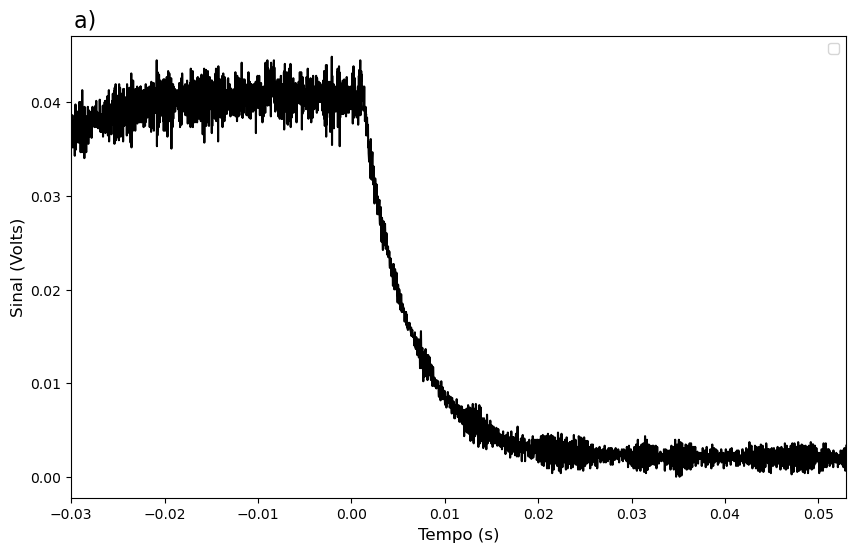

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Cálculo da média de todos os ensaios
mean_values = np.mean(dados, axis=0)

# Plotar o gráfico com a média
plt.figure(figsize=(10, 6))
plt.plot(t0 - t0[1300], mean_values - np.min(mean_values), color='black')
plt.title('a)                                                                                                         ', fontsize=16)
    
plt.ylabel("Sinal (Volts)", fontsize=12)
plt.xlabel("Tempo (s)", fontsize=12)
plt.legend()
plt.grid(False)  # Sem grid, conforme preferência
plt.xlim(-0.03, 0.053)
plt.show()

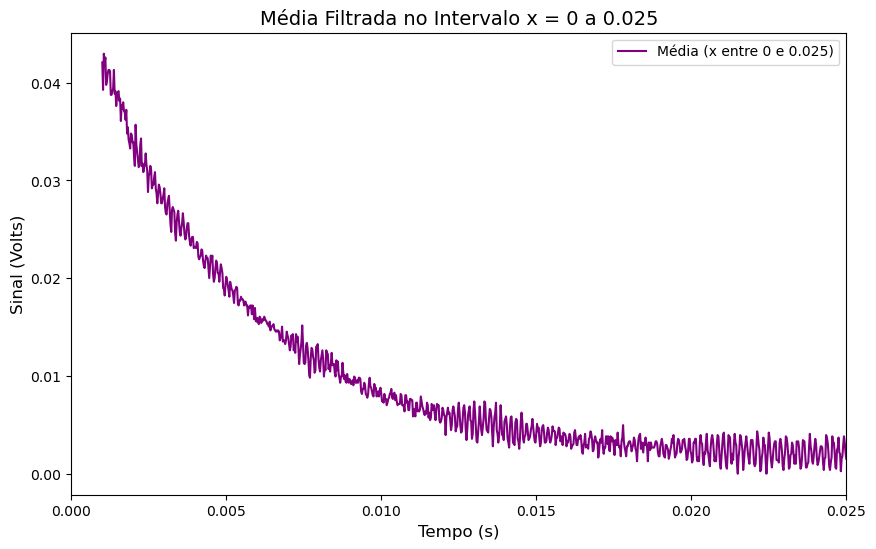

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Cálculo da média de todos os ensaios
mean_values = np.mean(dados, axis=0)

# Realizar a translação do eixo do tempo
translated_time = t0 - t0[1300]

# Encontrar os índices correspondentes ao intervalo x = 0 a x = 0.025
filtered_indices = np.where((translated_time >= 0.001) & (translated_time <= 0.025))

# Filtrar os dados da média e o eixo do tempo
filtered_time = translated_time[filtered_indices]
filtered_mean = mean_values[filtered_indices]

# Plotar o gráfico com os valores filtrados
plt.figure(figsize=(10, 6))
plt.plot(filtered_time, filtered_mean - np.min(filtered_mean), color='purple', label='Média (x entre 0 e 0.025)')
plt.title("Média Filtrada no Intervalo x = 0 a 0.025", fontsize=14)
plt.ylabel("Sinal (Volts)", fontsize=12)
plt.xlabel("Tempo (s)", fontsize=12)
plt.xlim(0.00,0.025)
plt.legend()
plt.grid(False)  # Sem grid, conforme preferência
plt.show()

# Lista com os valores filtrados
filtered_data = list(zip(filtered_time, filtered_mean))

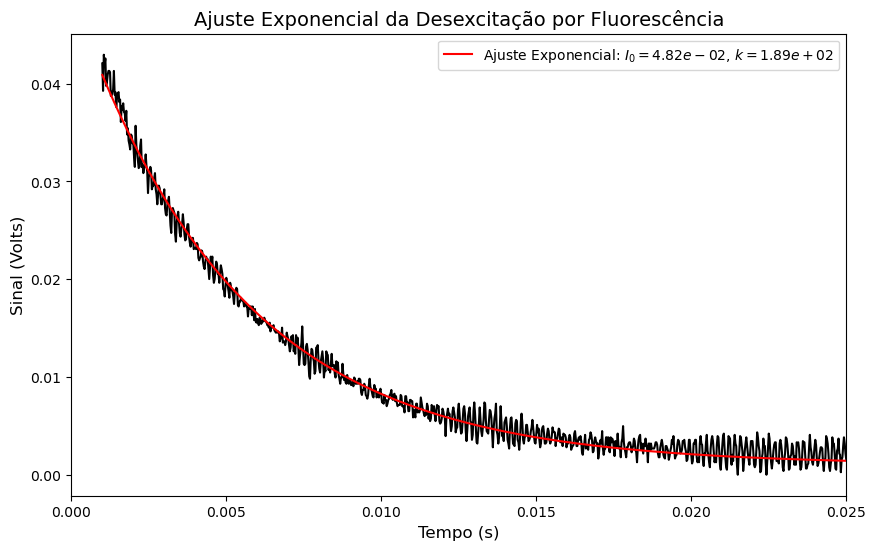

Parâmetros do ajuste: I0 = 4.82e-02, k = 1.89e+02


In [62]:
from scipy.optimize import curve_fit

# Função exponencial decrescente para o processo de fluorescência
def fluorescence_decay(t, I0, k):
    return I0 * np.exp(-k * t)+0.001

# Lista com os valores filtrados para o ajuste
adjusted_time = filtered_time
adjusted_intensity = filtered_mean - np.min(filtered_mean)  # Remoção do valor mínimo para evitar valores negativos

# Realizar o ajuste exponencial usando apenas os valores filtrados
params, _ = curve_fit(fluorescence_decay, adjusted_time, adjusted_intensity)

# Parâmetros do ajuste
I0, k = params

# Gerar os valores ajustados
fitted_values = fluorescence_decay(adjusted_time, I0, k)

# Plotar os dados filtrados e o ajuste
plt.figure(figsize=(10, 6))
plt.plot(adjusted_time, adjusted_intensity, color='black')
plt.plot(adjusted_time, fitted_values, '-', label=f'Ajuste Exponencial: $I_0={I0:.2e}$, $k={k:.2e}$', color='red')
plt.title("Ajuste Exponencial da Desexcitação por Fluorescência", fontsize=14)
plt.ylabel("Sinal (Volts)", fontsize=12)
plt.xlabel("Tempo (s)", fontsize=12)
plt.xlim(0.00, 0.025)
plt.legend()
plt.grid(False)  # Sem grid, conforme preferência
plt.show()

# Exibir os parâmetros do ajuste
print(f"Parâmetros do ajuste: I0 = {I0:.2e}, k = {k:.2e}")


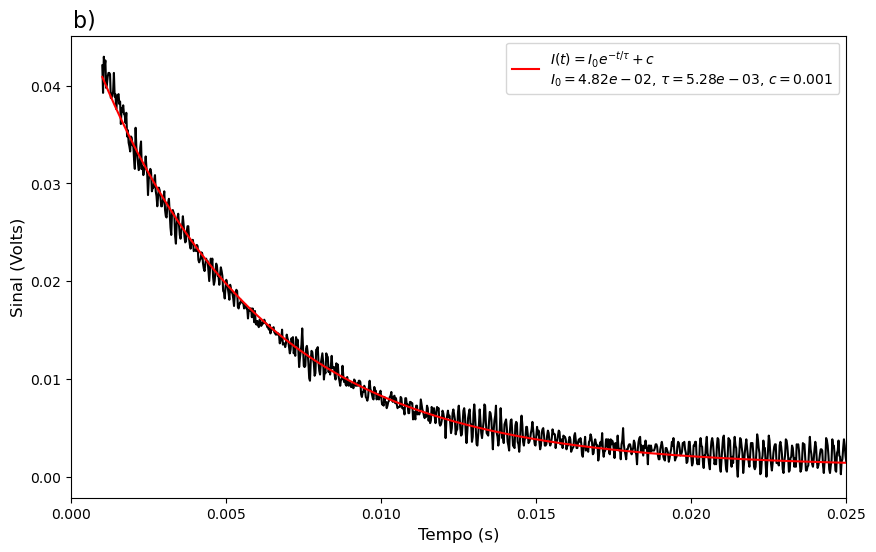

Parâmetros do ajuste: I(t) = I_0 e^(-t/tau) + c
I_0 = 4.82e-02, tau = 5.28e-03, c = 0.001


In [87]:
from scipy.optimize import curve_fit

# Função exponencial decrescente para o processo de fluorescência
def fluorescence_decay(t, I0, k):
    return I0 * np.exp(-k * t) + 0.001

# Lista com os valores filtrados para o ajuste
adjusted_time = filtered_time
adjusted_intensity = filtered_mean - np.min(filtered_mean)  # Remoção do valor mínimo para evitar valores negativos

# Realizar o ajuste exponencial usando apenas os valores filtrados
params, _ = curve_fit(fluorescence_decay, adjusted_time, adjusted_intensity)

# Parâmetros do ajuste
I0, k = params
tau = 1 / k  # Calcular tau a partir de k
c = 0.001  # Constante fixa no modelo

# Gerar os valores ajustados
fitted_values = fluorescence_decay(adjusted_time, I0, k)

# Plotar os dados filtrados e o ajuste
plt.figure(figsize=(10, 6))
plt.plot(adjusted_time, adjusted_intensity, color='black')
plt.title('b)                                                                                                         ', fontsize=16)
    
plt.plot(adjusted_time, fitted_values, '-', label=f'$I(t) = I_0 e^{{-t/\\tau}} + c$\n$I_0={I0:.2e}$, $\\tau={tau:.2e}$, $c={c:.3f}$', color='red')
plt.ylabel("Sinal (Volts)", fontsize=12)
plt.xlabel("Tempo (s)", fontsize=12)
plt.xlim(0.00, 0.025)
plt.legend()
plt.grid(False)  # Sem grid, conforme preferência
plt.show()

# Exibir os parâmetros do ajuste
print(f"Parâmetros do ajuste: I(t) = I_0 e^(-t/tau) + c")
print(f"I_0 = {I0:.2e}, tau = {tau:.2e}, c = {c:.3f}")